## Telecom Churn Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at **high risk of churn.**




### Definitions of Churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

#### Reading data set and understanding business objective

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom=pd.read_csv("telecom_churn_data.csv")
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
telecom.describe()
# Understanding how data is and contains outliers etc.

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [5]:
telecom.shape

(99999, 226)

In [6]:
# Dropping if duplicates rows avaialable
telecom.drop_duplicates()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

In [7]:
# As it many columns were present better to understand Data Dictionary
pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [8]:
telecom_copy=telecom.copy()

In [9]:
# After session got idea to segregate data in lists to handle many columns

# columns which are not goint to add in our study
unique_columns = ['mobile_number', 'circle_id']

# Time series columns
time_columns = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]
# Categorical variable segregation
cat_columns =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
# Whatever left will be continuous variables
cont_columns = [column for column in telecom.columns if column not in unique_columns + time_columns + cat_columns]


In [10]:
(round(telecom.isnull().sum()/len(telecom.index),2)*100).sort_values(ascending=False)
# Dataset having large amount of null values

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
                            ... 
last_day_rch_amt_6           0.0
last_day_rch_amt_7           0.0
last_day_rch_amt_8           0.0
last_day_rch_amt_9           0.0
mobile_number                0.0
Length: 226, dtype: float64

### Data Cleaning

In [11]:
# As per description in case study recharge columns are the one we need to focus first we will impute zero
# There is no recharge we assume customer did not recharge
impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
telecom[impute_zero]=telecom[impute_zero].apply(lambda x:x.fillna(0))

In [12]:
# Drop unique and time related columns as id is not usefull and we are not doint ime series analysis

telecom = telecom.drop(unique_columns + time_columns, axis=1)
telecom.shape

(99999, 212)

In [13]:
telecom.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         98981.0         98981.0         98981.0  99999.000000   
mean              0.0             0.0             0.0    282.987358   
std               0.0             0.0             0.0    328.439770   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.411500   
50%               0.0             0.0             0.0    197.704000   
75%               0.0             0.0             0.0    371.060000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000   
mean     278.536648    279.154731    261.645069    132.395875    133.670805   
std      338.156291    344.474791    341.998630    297.207406    308.794148   
min    -2014.045000   -945.808000  -1899.505000      0.000000      0.000000   
25%       86.980500     84.126000     62.685000      7.380000      6.660000   
50%      191.640000    192.080000    176.849000     34.310000     32.330000   
75%      365.344500    369.370500    353.466500    118.740000    115.595000   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000   
mean     133.018098    130.302327    197.935577    197.045133    196.574803   
std      308.951589    308.477668    316.851613    325.862803    327.170662   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.460000      5.330000     34.730000     32.190000     31.630000   
50%       32.360000     29.840000     96.310000     91.735000     92.140000   
75%      115.860000    112.130000    231.860000    226.815000    228.260000   
max    10752.560000  10427.460000   8362.360000   9667.130000  14007.340000   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  92254.000000   96062.000000   96140.000000   94621.000000   
mean     190.337222       9.950013       7.149898       7.292981   
std      319.396092      72.825411      73.447948      68.402466   
min        0.000000       0.000000       0.000000       0.000000   
25%       27.130000       0.000000       0.000000       0.000000   
50%       87.290000       0.000000       0.000000       0.000000   
75%      220.505000       0.000000       0.000000       0.000000   
max    10310.760000   13724.380000   15371.040000   13095.360000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   92254.000000   96062.000000   96140.000000   94621.000000   
mean        6.343841      13.911337       9.818732       9.971890   
std        57.137537      71.443196      58.455762      64.713221   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      8464.030000    3775.110000    2812.040000    5337.040000   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   92254.000000      96062.000000      96140.000000      94621.000000   
mean        8.555519         47.100763         46.473010         45.887806   
std        58.438186        150.856393        155.318705        151.184830   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.630000          1.600000   
50%         0.000000         11.910000         11.610000         11.730000   
75%         0.000000         40.960000         39.910000         40.110000   
max      4428.460000       6431.330000       7400.660000      10752.560000   

     

### Categorical variables treatment

In [14]:
# Fixing categorical variables 

modes=telecom[cat_columns].agg('mode')

for col in cat_columns:
    telecom[col]=telecom[col].fillna(modes[col])


In [15]:
(round(telecom.isnull().sum()/len(telecom.index),2)*100).sort_values(ascending=False)

count_rech_2g_6     75.0
arpu_3g_6           75.0
night_pck_user_6    75.0
count_rech_3g_6     75.0
fb_user_6           75.0
                    ... 
max_rech_data_6      0.0
max_rech_data_7      0.0
max_rech_data_8      0.0
max_rech_data_9      0.0
sep_vbc_3g           0.0
Length: 212, dtype: float64

In [16]:
# Creation of dummies 
def doDummies(telecom,col):
    
    telecom_1 = pd.get_dummies(telecom[col],prefix=col.split("_")[0]+"_"+col.split("_")[-1],drop_first=True)
    dx = pd.concat([telecom,telecom_1], axis=1)
    return dx

In [17]:
print("Before dummy columns: ",telecom.shape)
for col in cat_columns:
    telecom = doDummies(telecom,col)
    
telecom.drop(cat_columns, axis=1, inplace=True)
print("After dummy columns: ",telecom.shape)

Before dummy columns:  (99999, 212)
After dummy columns:  (99999, 212)


In [18]:
telecom=telecom.dropna(thresh=telecom.shape[0]*0.6,how='all',axis=1)
telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100          NaN          NaN         0.00          NaN           NaN   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN          0.00           NaN            NaN            NaN   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            NaN            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            NaN               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0               NaN           NaN           NaN          0.00           NaN   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48       

In [19]:
telecom.shape

(99999, 196)

In [20]:
telecom.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         98981.0         98981.0         98981.0  99999.000000   
mean              0.0             0.0             0.0    282.987358   
std               0.0             0.0             0.0    328.439770   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.411500   
50%               0.0             0.0             0.0    197.704000   
75%               0.0             0.0             0.0    371.060000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000   
mean     278.536648    279.154731    261.645069    132.395875    133.670805   
std      338.156291    344.474791    341.998630    297.207406    308.794148   
min    -2014.045000   -945.808000  -1899.505000      0.000000      0.000000   
25%       86.980500     84.126000     62.685000      7.380000      6.660000   
50%      191.640000    192.080000    176.849000     34.310000     32.330000   
75%      365.344500    369.370500    353.466500    118.740000    115.595000   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000   
mean     133.018098    130.302327    197.935577    197.045133    196.574803   
std      308.951589    308.477668    316.851613    325.862803    327.170662   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.460000      5.330000     34.730000     32.190000     31.630000   
50%       32.360000     29.840000     96.310000     91.735000     92.140000   
75%      115.860000    112.130000    231.860000    226.815000    228.260000   
max    10752.560000  10427.460000   8362.360000   9667.130000  14007.340000   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  92254.000000   96062.000000   96140.000000   94621.000000   
mean     190.337222       9.950013       7.149898       7.292981   
std      319.396092      72.825411      73.447948      68.402466   
min        0.000000       0.000000       0.000000       0.000000   
25%       27.130000       0.000000       0.000000       0.000000   
50%       87.290000       0.000000       0.000000       0.000000   
75%      220.505000       0.000000       0.000000       0.000000   
max    10310.760000   13724.380000   15371.040000   13095.360000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   92254.000000   96062.000000   96140.000000   94621.000000   
mean        6.343841      13.911337       9.818732       9.971890   
std        57.137537      71.443196      58.455762      64.713221   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      8464.030000    3775.110000    2812.040000    5337.040000   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   92254.000000      96062.000000      96140.000000      94621.000000   
mean        8.555519         47.100763         46.473010         45.887806   
std        58.438186        150.856393        155.318705        151.184830   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.630000          1.600000   
50%         0.000000         11.910000         11.610000         11.730000   
75%         0.000000         40.960000         39.910000         40.110000   
max      4428.460000       6431.330000       7400.660000      10752.560000   

     

In [21]:
# zero values in whole columns to be dropped as not of use, also mobile number and circle id is of no use
#loc_og_t2o_mou	std_og_t2o_mou	loc_ic_t2o_mou 
#std_og_t2c_mou_6	std_og_t2c_mou_7	std_og_t2c_mou_8	std_og_t2c_mou_9	
# std_ic_t2o_mou_6	std_ic_t2o_mou_7	std_ic_t2o_mou_8	std_ic_t2o_mou_9
#
telecom=telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
                      'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','loc_ic_t2o_mou'],axis=1)
telecom.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.2400

In [22]:
telecom.shape

(99999, 185)

### Data Preparation

**1. Derive new features**

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.


### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last `(i.e. the ninth) ` month using the data (features) from the <font color = blue>first three months</font>. To do this task well, understanding the typical customer behaviour during churn will be helpful.

It means 6,7 are **Good phase recharge**

In [23]:
import warnings
warnings.filterwarnings('ignore')

# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom['total_data_rech_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7


# calculate average recharge done by customer in June and July
telecom['good_phase_rech'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

####  Seventy percent High Value customer filteration
As per business defination we need to do fileration of high value customer first to make data set smaller. 70% of High values customer we will choose

In [24]:
seventy_percent = telecom['good_phase_rech'].quantile(.70)
telecom= telecom[(telecom['good_phase_rech'] >= seventy_percent)]
telecom.shape

(30001, 190)

In [25]:
telecom = telecom.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7'], axis=1)
telecom.shape

(30001, 186)

In [26]:
(round(telecom.isnull().sum()/len(telecom.index),2)*100).sort_values(ascending=False)

loc_og_t2c_mou_9      6.0
roam_og_mou_9         6.0
loc_ic_mou_9          6.0
loc_og_t2m_mou_9      6.0
loc_og_t2f_mou_9      6.0
                     ... 
total_rech_data_7     0.0
total_rech_data_6     0.0
last_day_rch_amt_9    0.0
last_day_rch_amt_8    0.0
arpu_6                0.0
Length: 186, dtype: float64

#### 'Churn’ phase defination as per dataset: 
In this phase, the customer is said to have churned, define churn based on this phase means 9th month. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [27]:
# As given in business defination month of sept gives the number of churned i.e. if no data usage customer churned 
# Or no incoming call or outgoing calls usage cutomer churned which is defined in below function
def churned(a):
    if((a.total_ic_mou_9==0)&(a.total_og_mou_9==0)&(a.vol_2g_mb_9==0)&(a.vol_3g_mb_9==0)):
        return 1
    else:
        return 0

In [28]:
# Use of function to get number of churned
telecom['churn']=telecom.apply(churned,axis=1)

In [29]:
telecom.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [30]:
print(telecom.churn.value_counts()*100/telecom.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


In [31]:
# As we derive already churn from data need to delete all variables relating to 9th month
telecom = telecom.filter(regex='[^9]$', axis=1)
telecom.shape

(30001, 144)

In [32]:
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803          NaN          NaN         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN           NaN          0.00            NaN            NaN   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [33]:
# While checking dataset still month 9 related data found need to drop

telecom=telecom.drop(['fb_9_1.0','night_9_1.0'],axis=1)
telecom.shape

(30001, 142)

### EDA

In [34]:
# For visualization 

import matplotlib.pyplot as plt
import seaborn as sns

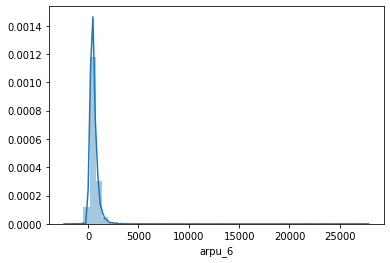

In [35]:
sns.distplot(telecom.arpu_6)

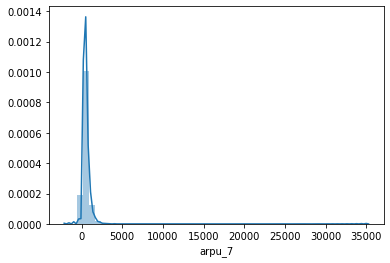

In [36]:
sns.distplot(telecom.arpu_7)

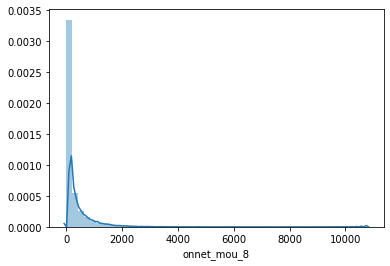

In [37]:
sns.distplot(telecom.onnet_mou_8)

### Above analysis shows our variables are positive skewed skew became less after outlier treatment

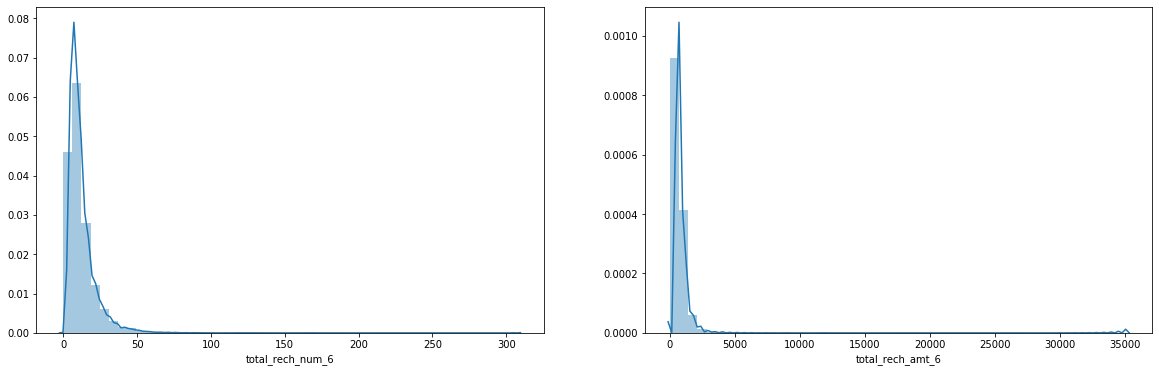

In [38]:
# 6th month recharge univariate
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(telecom['total_rech_num_6'])
plt.subplot(1,2,2)
sns.distplot(telecom['total_rech_amt_6'])
plt.show()

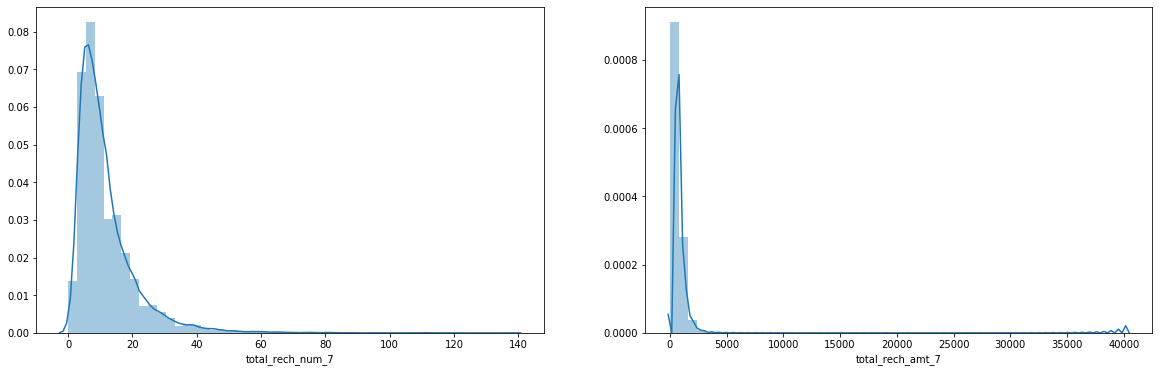

In [39]:
# 7th month recharge univariate
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(telecom['total_rech_num_7'])
plt.subplot(1,2,2)
sns.distplot(telecom['total_rech_amt_7'])
plt.show()

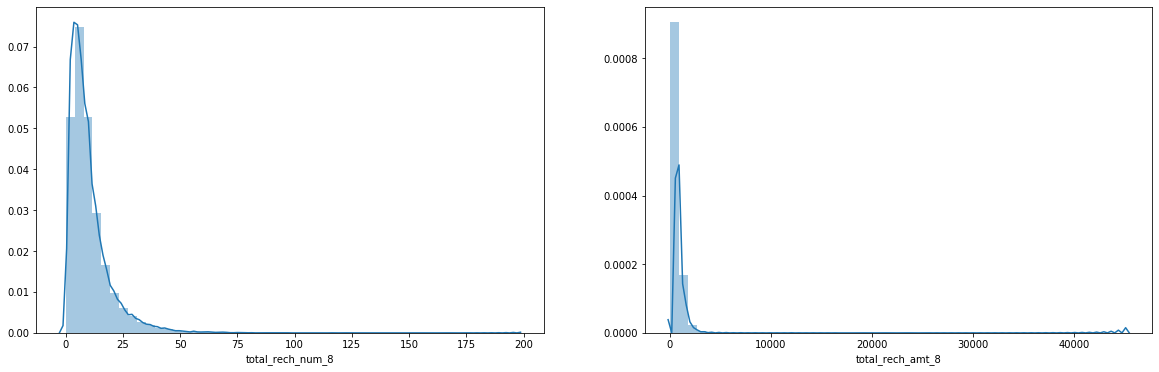

In [40]:
# 8th month recharge univariate
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(telecom['total_rech_num_8'])
plt.subplot(1,2,2)
sns.distplot(telecom['total_rech_amt_8'])
# plt.show()

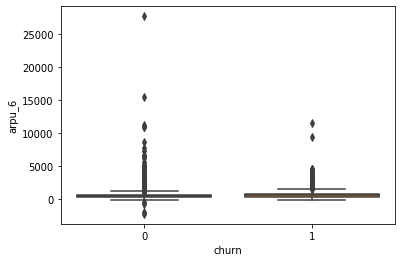

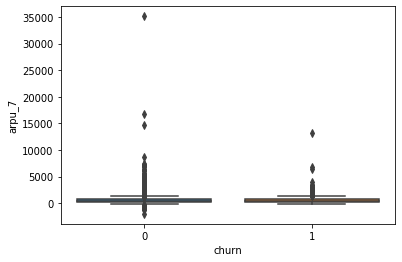

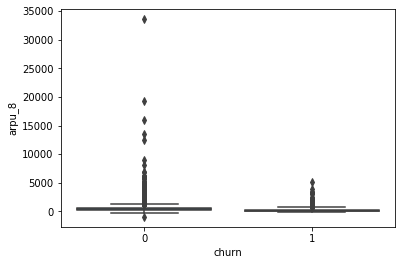

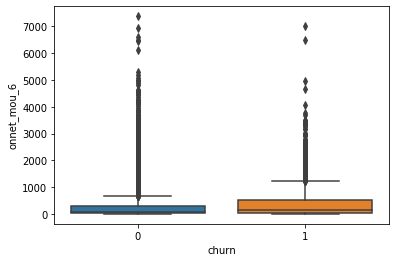

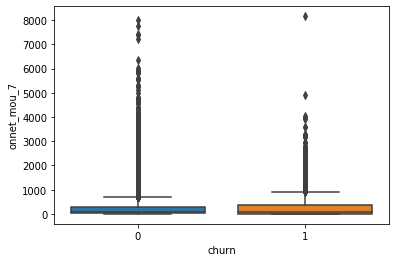

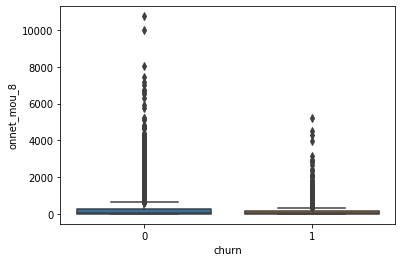

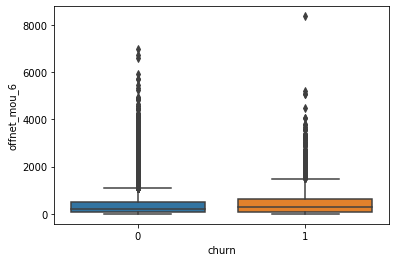

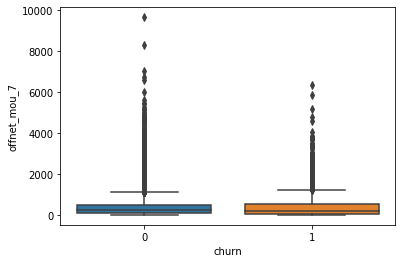

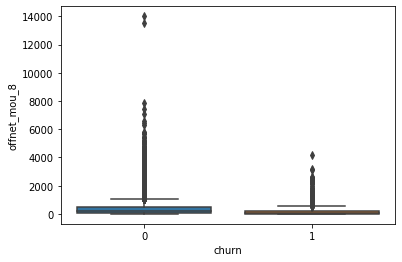

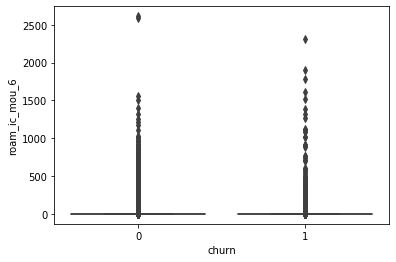

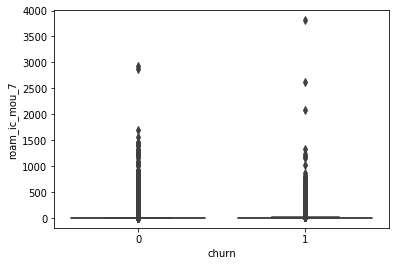

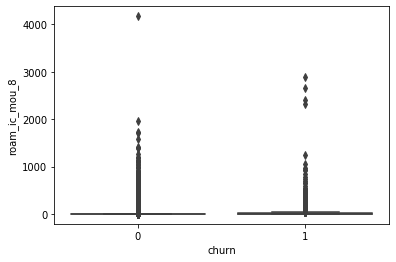

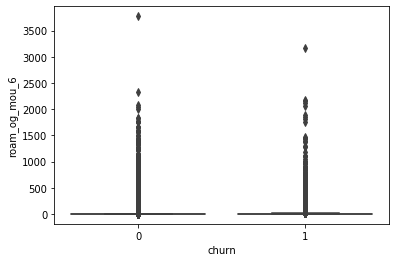

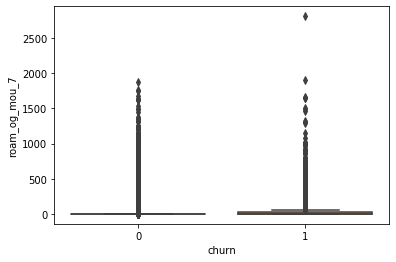

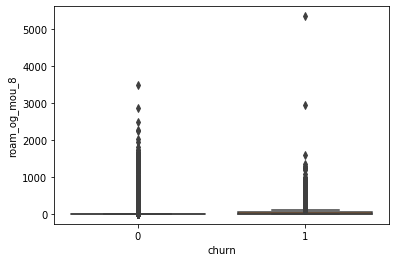

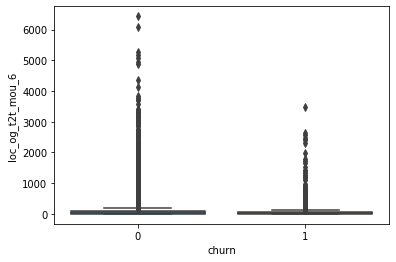

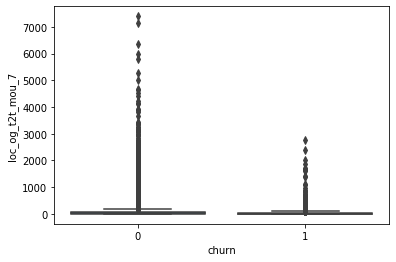

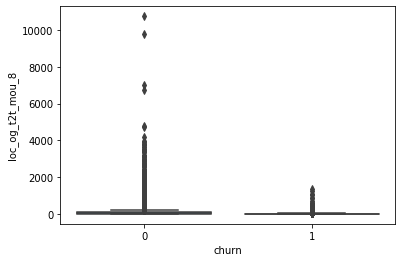

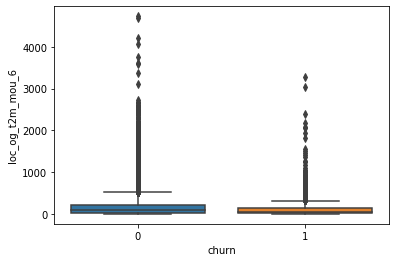

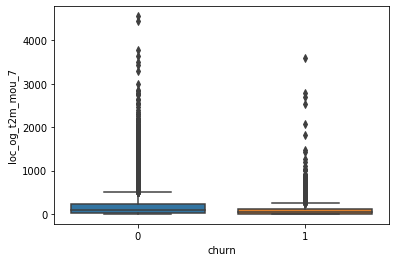

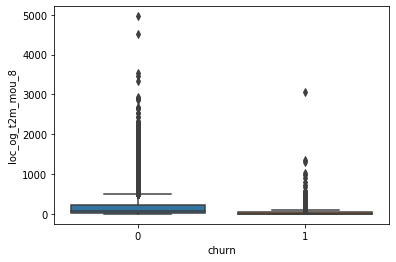

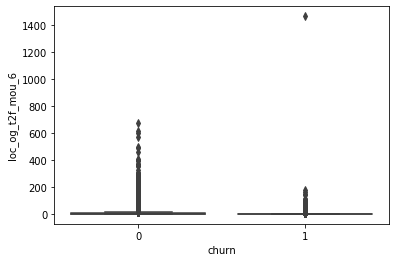

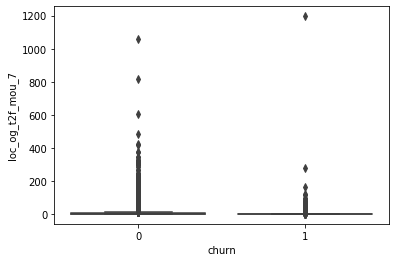

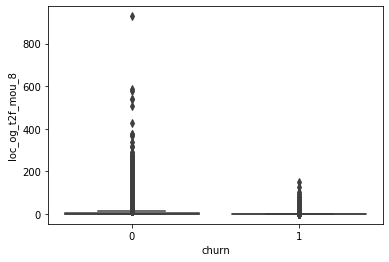

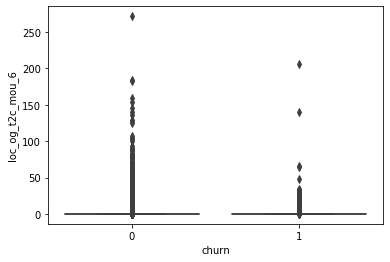

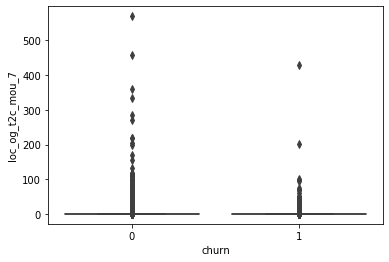

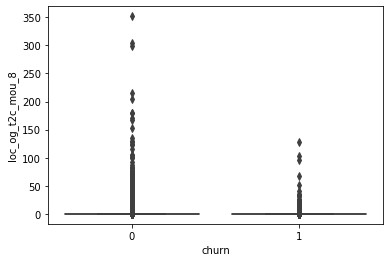

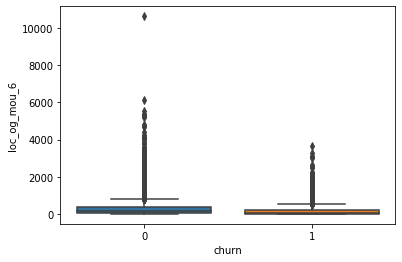

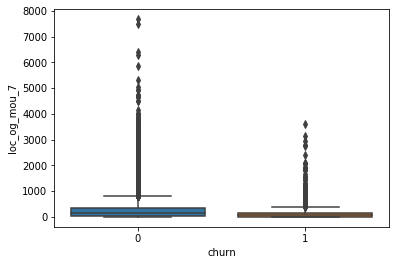

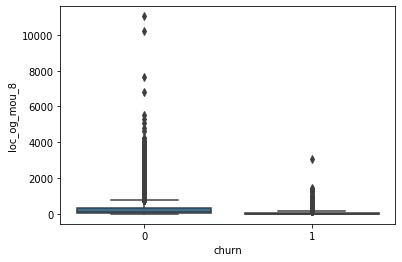

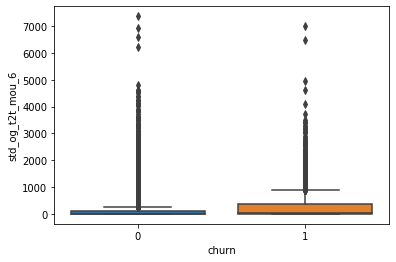

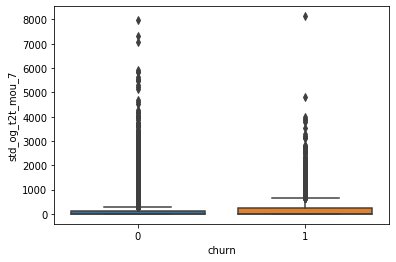

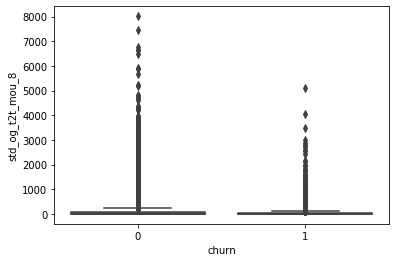

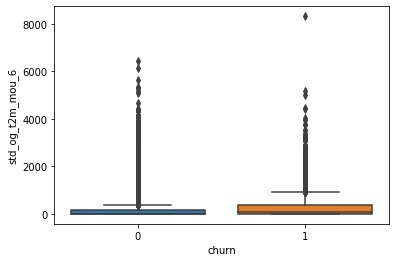

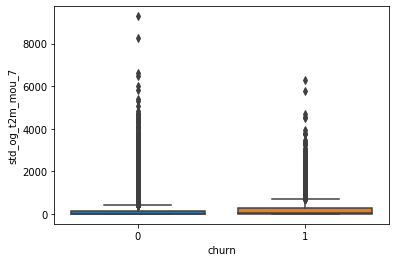

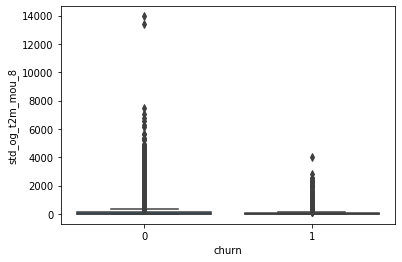

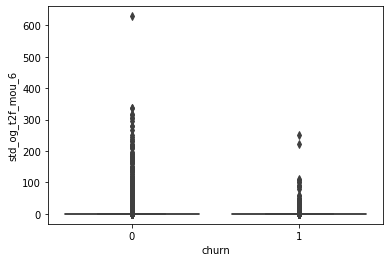

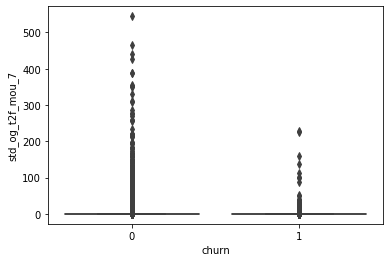

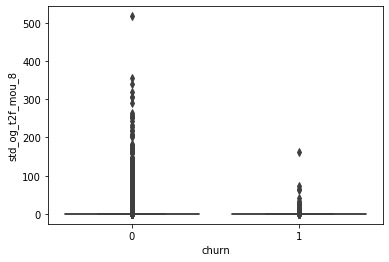

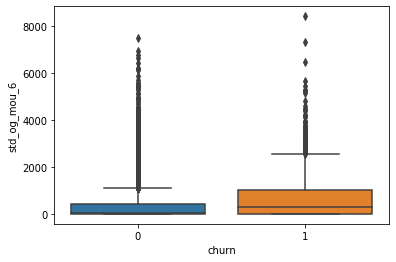

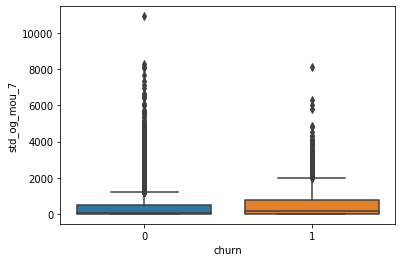

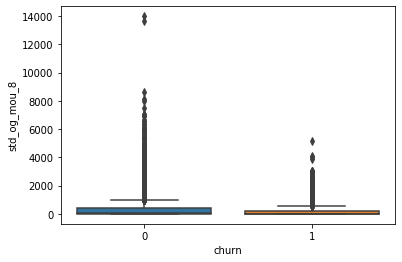

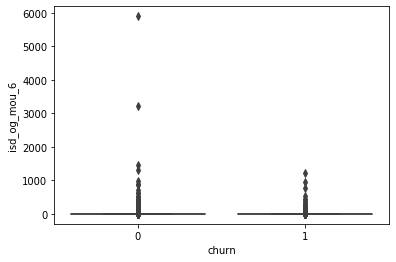

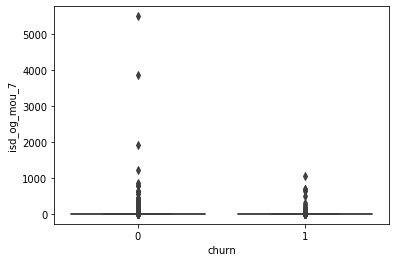

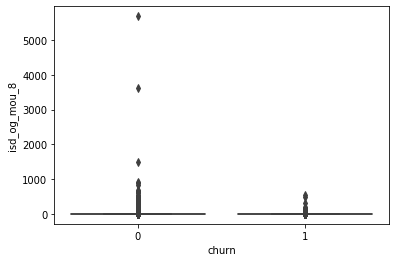

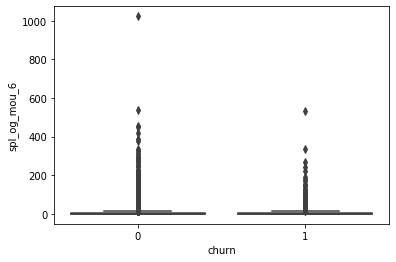

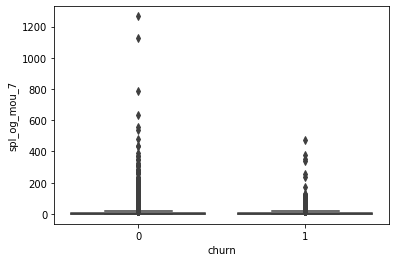

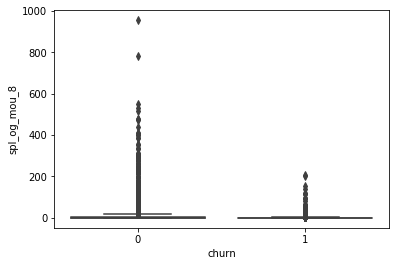

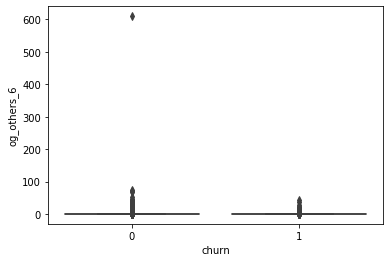

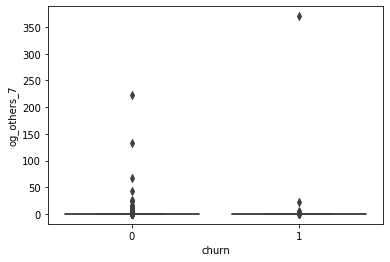

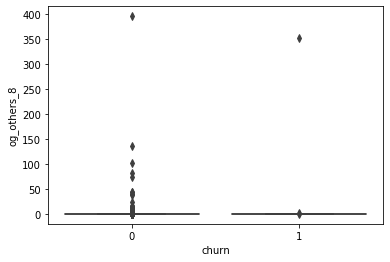

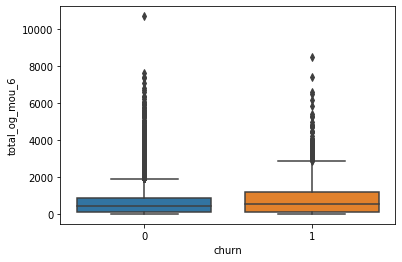

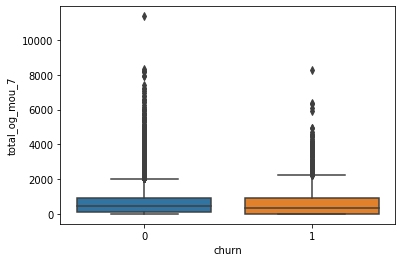

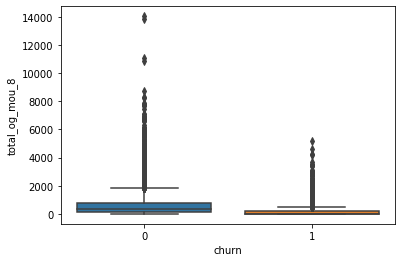

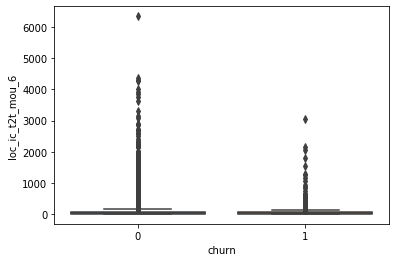

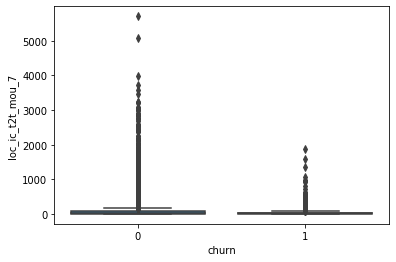

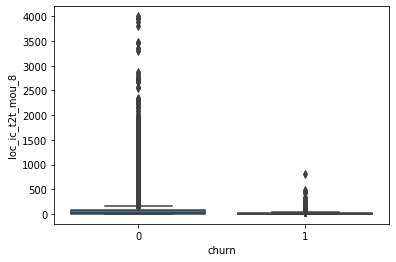

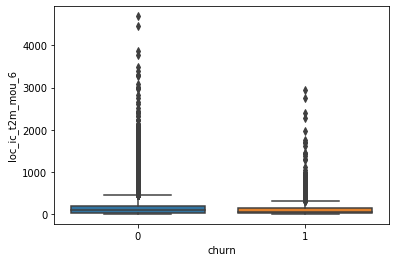

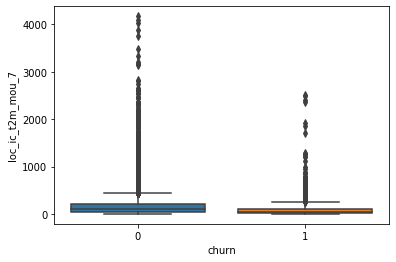

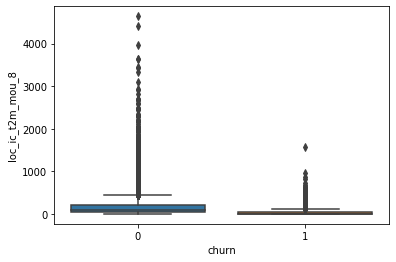

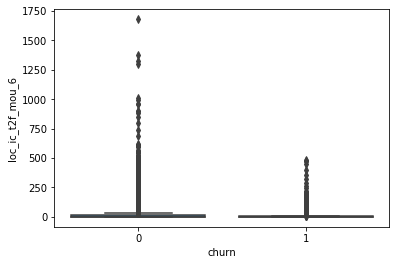

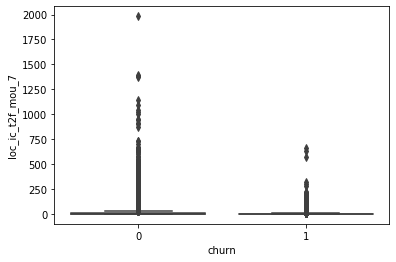

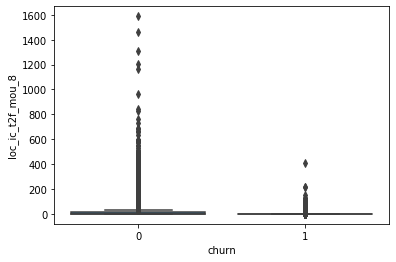

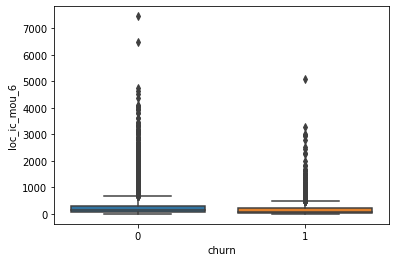

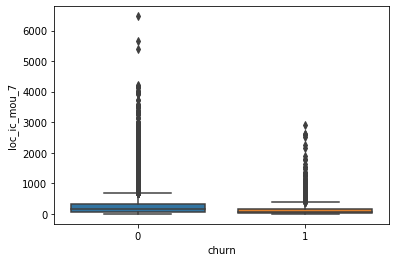

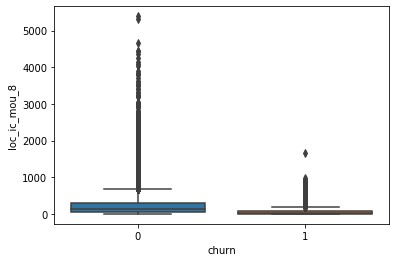

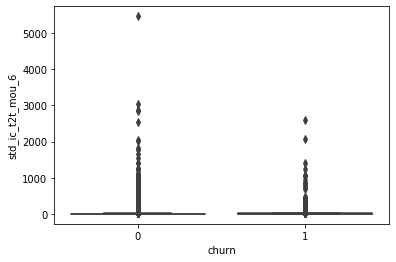

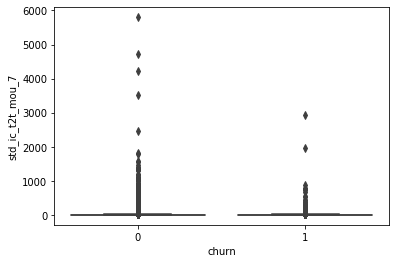

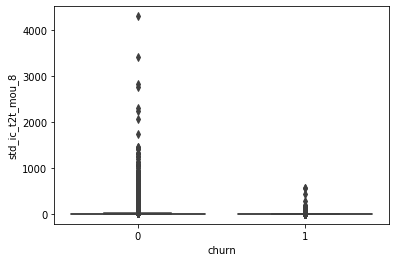

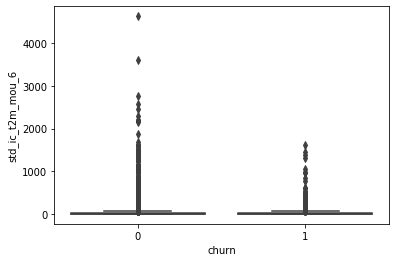

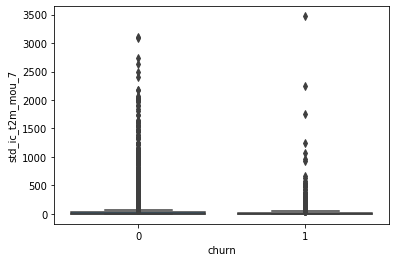

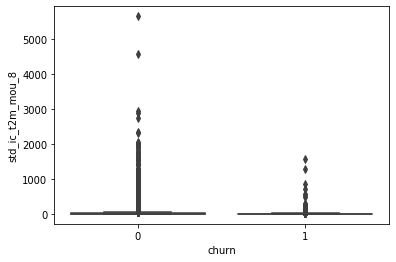

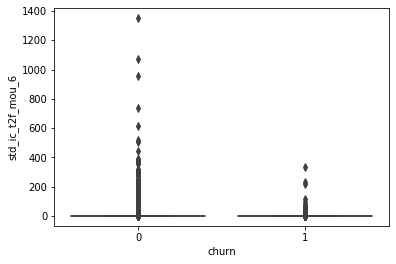

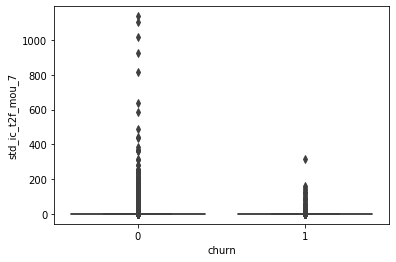

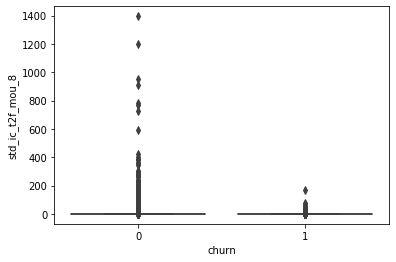

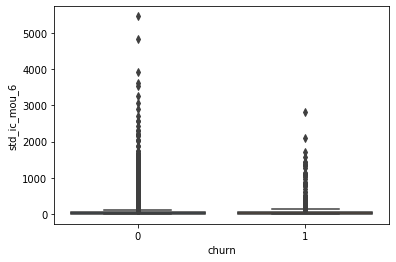

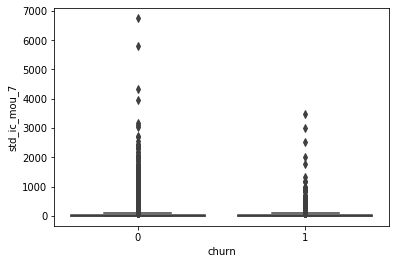

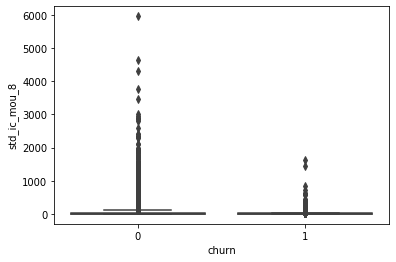

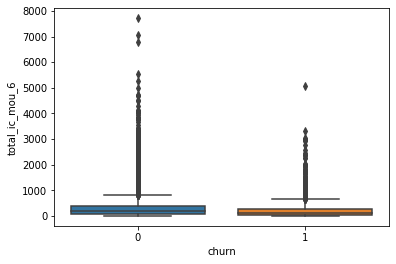

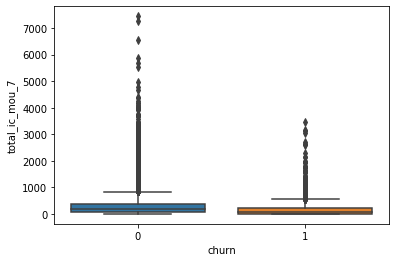

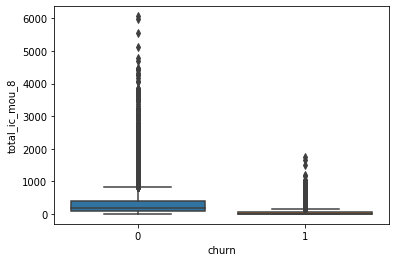

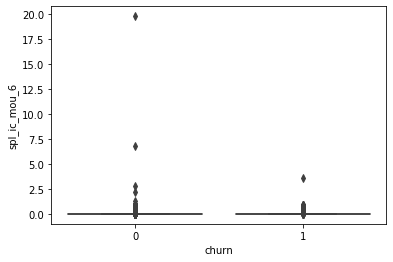

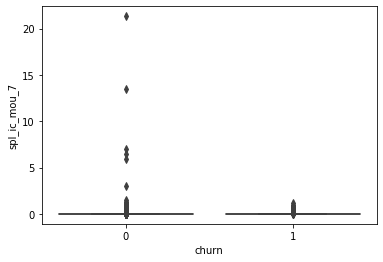

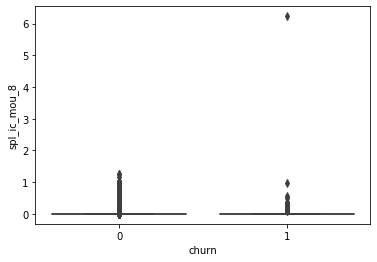

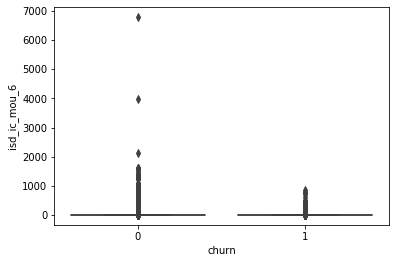

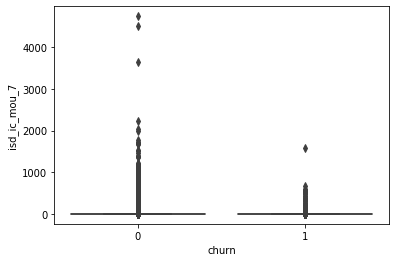

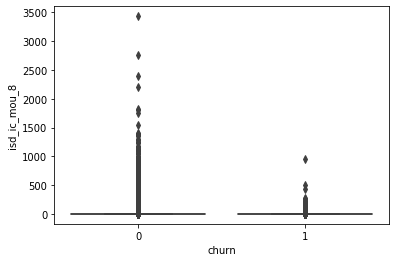

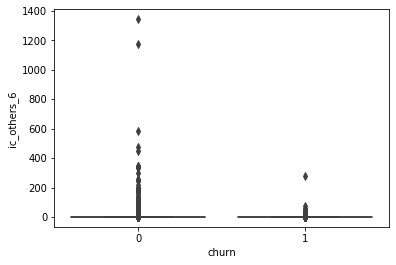

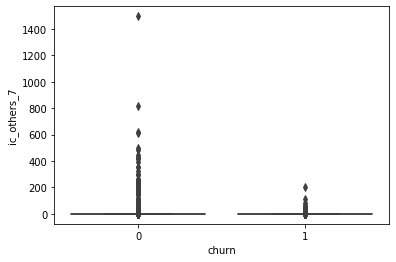

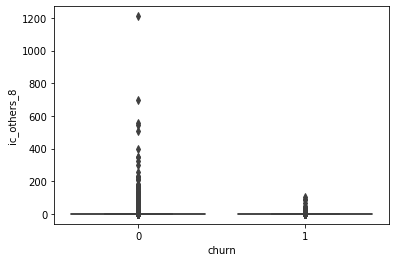

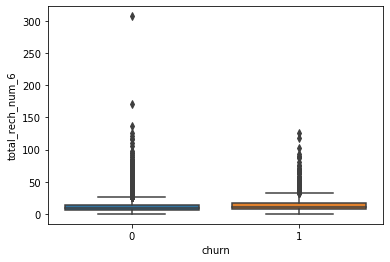

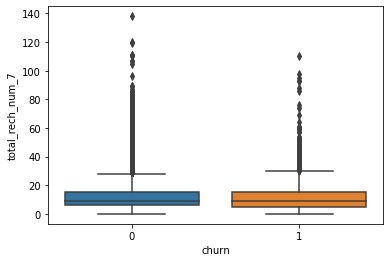

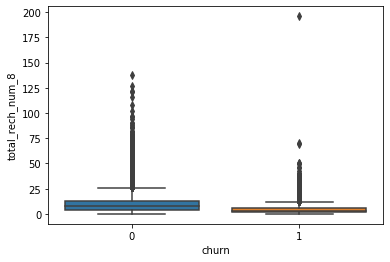

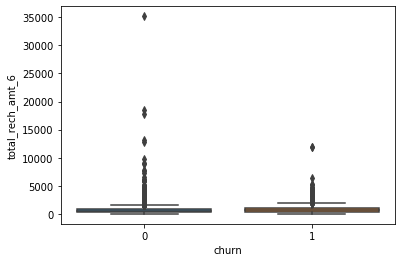

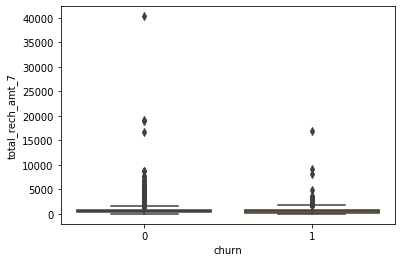

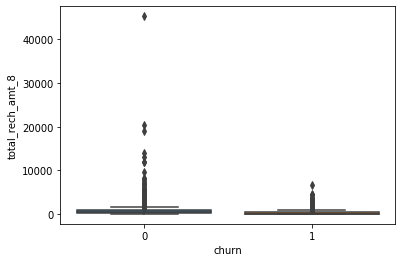

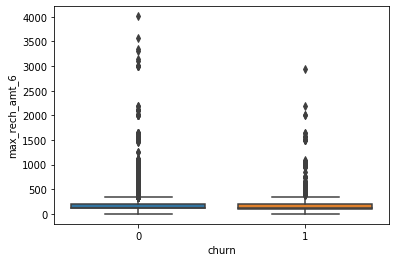

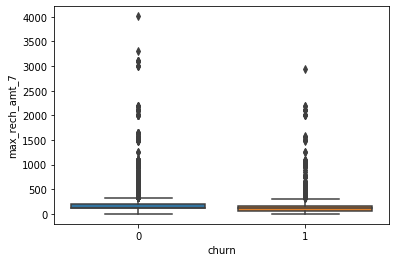

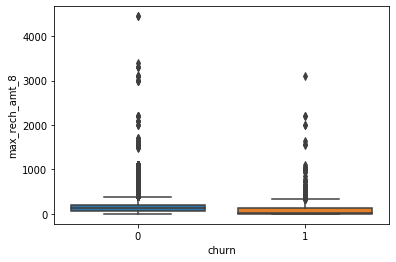

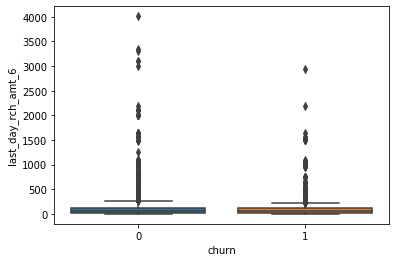

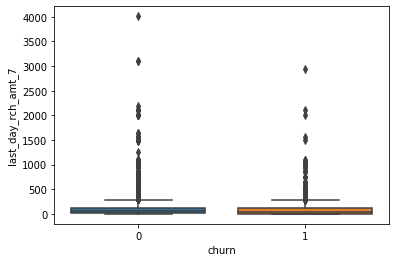

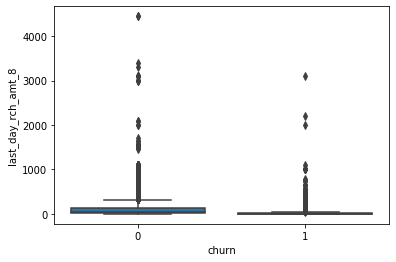

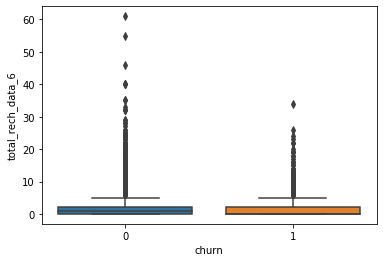

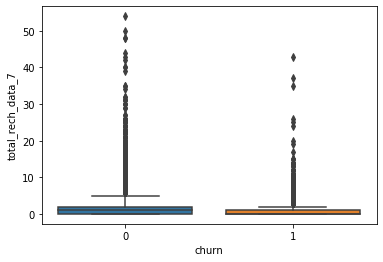

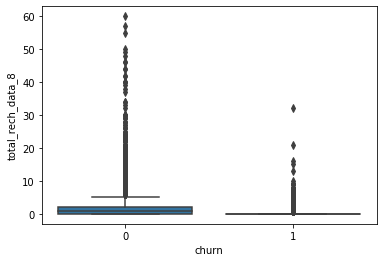

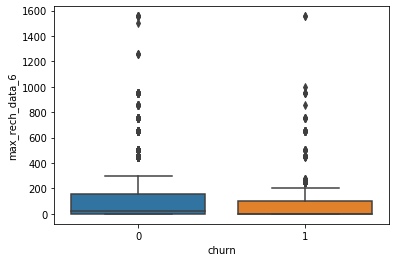

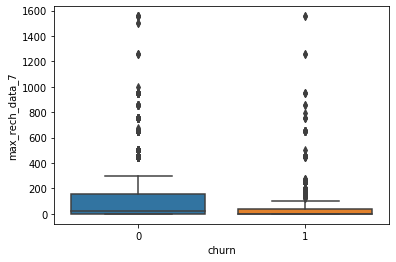

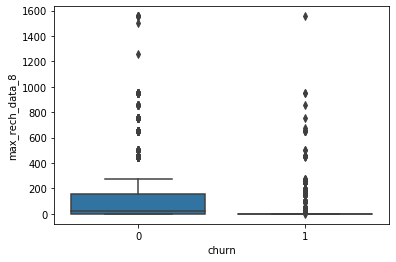

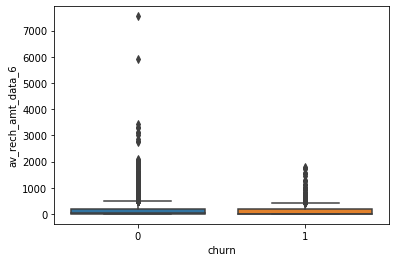

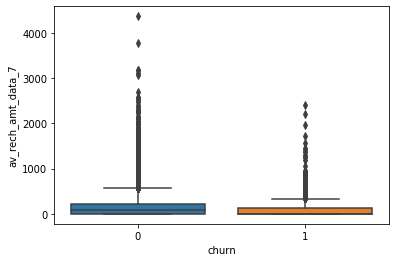

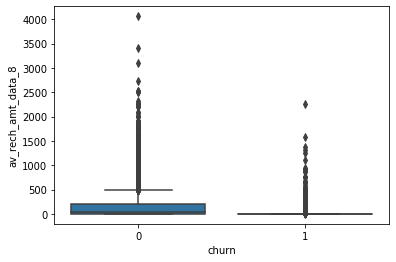

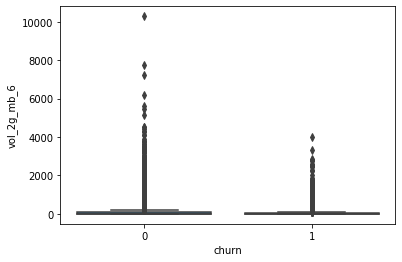

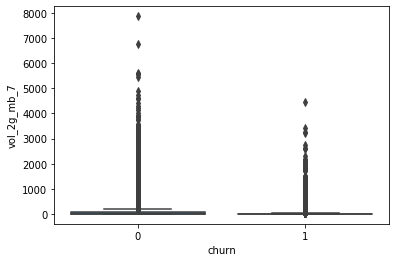

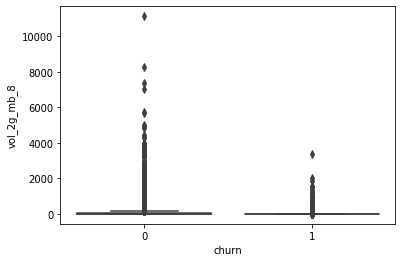

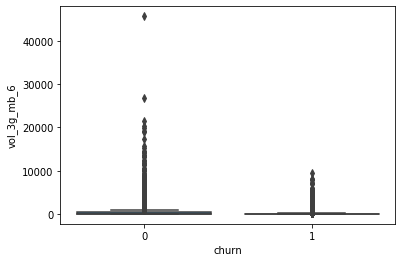

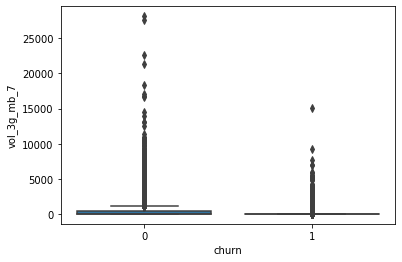

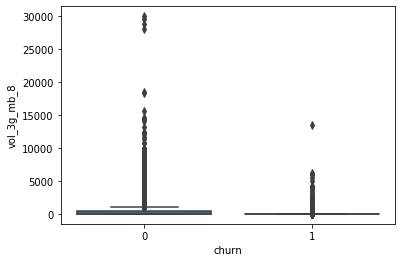

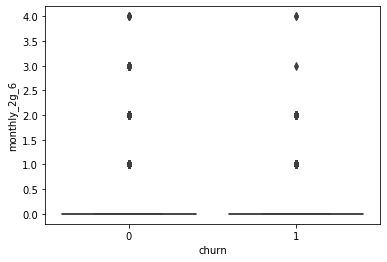

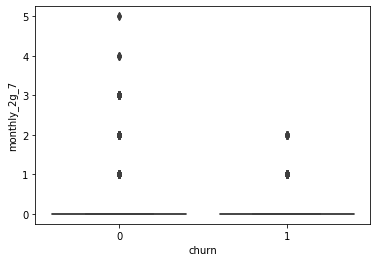

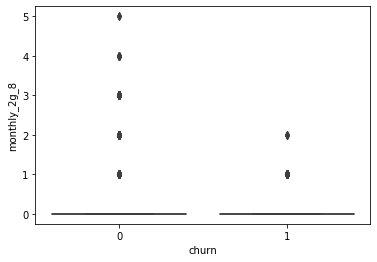

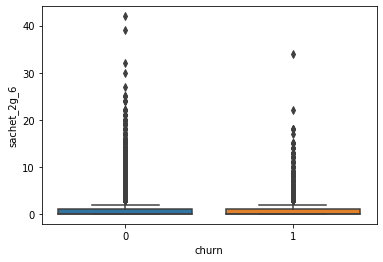

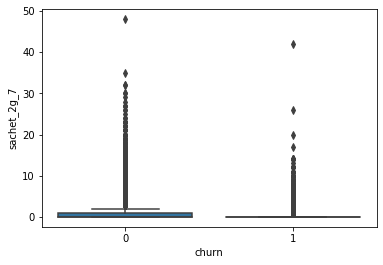

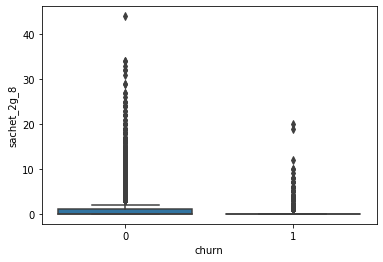

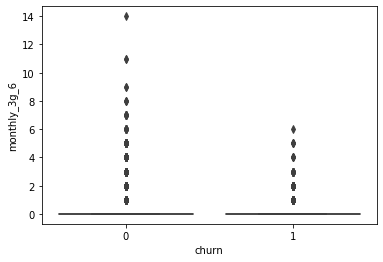

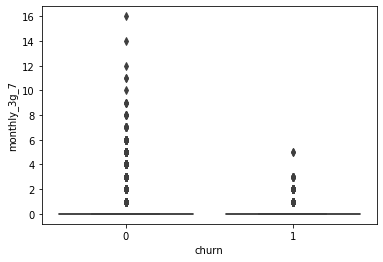

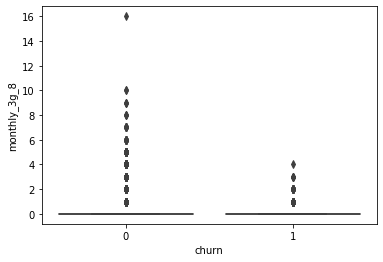

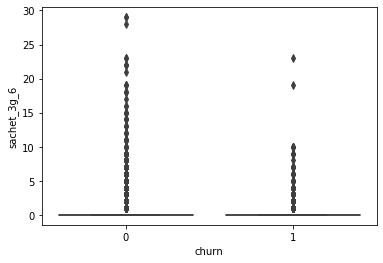

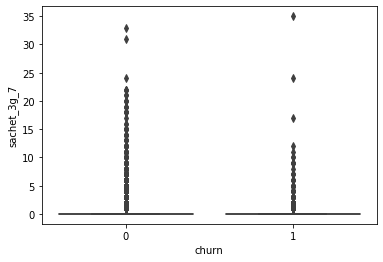

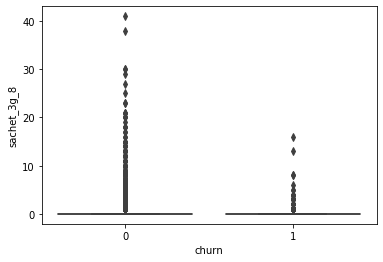

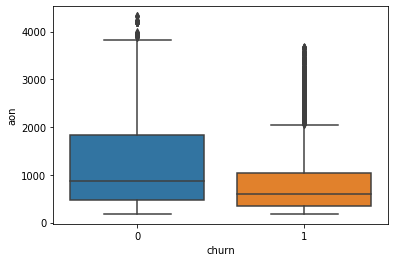

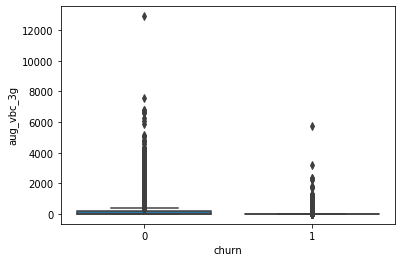

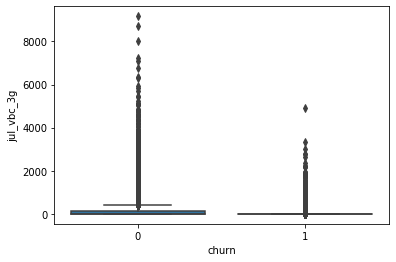

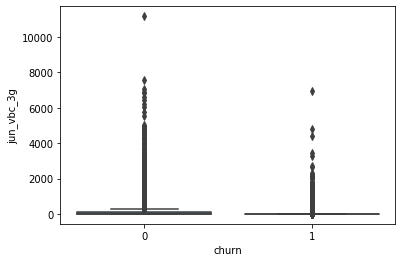

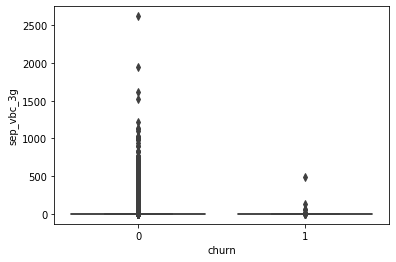

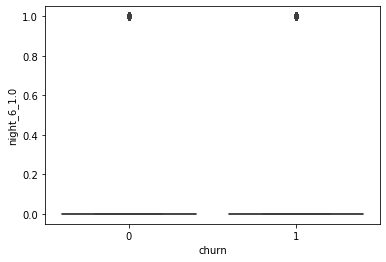

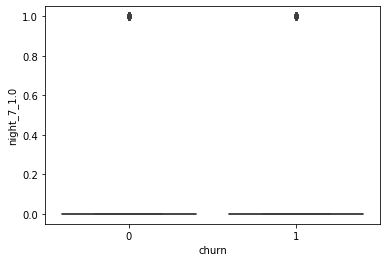

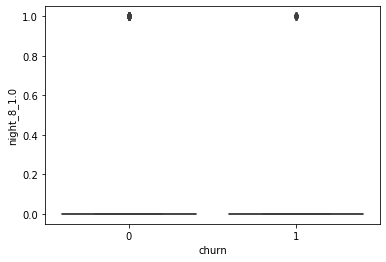

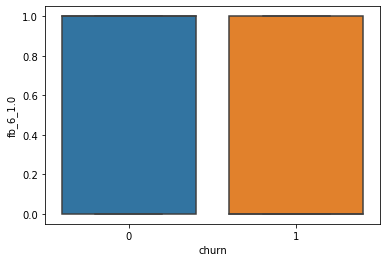

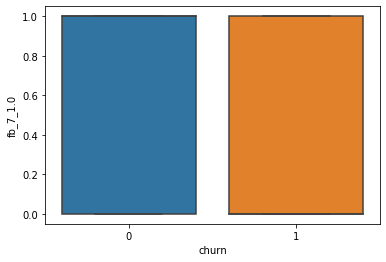

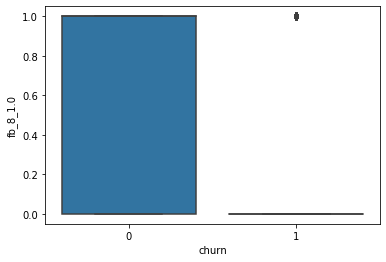

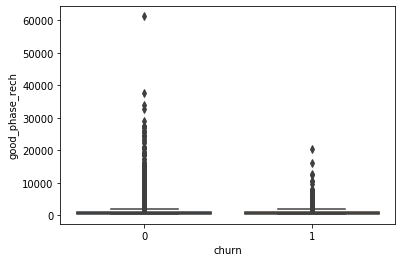

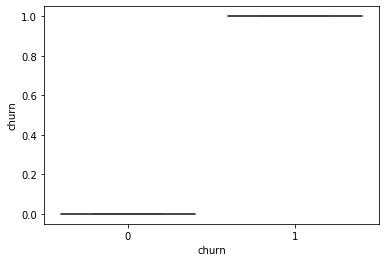

In [41]:
# Box plots with resepect to churn to visualize data
for _column in telecom:
    plt.figure()
    sns.boxplot(y=_column, x='churn', data=telecom, orient='v')
    plt.show()

### Above analysis shows our data having outliers later we treat in `Data cleaning`

In [42]:
telecom['churn'] = pd.to_numeric(telecom['churn'])

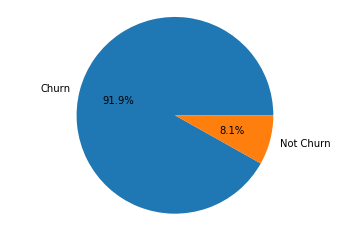

In [43]:
# Looking at the values of Yes and No's in the target variable CHURN
labels = ['Churn','Not Churn']
sizes = [telecom['churn'].value_counts()[0],telecom['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()

### Above analysis shows data is imbalance

In [44]:
# Check row wise missing values again
#Checking row wise null 
row_treat = telecom.isnull().sum(axis=1)
row_treat[row_treat>0].describe()

count    1497.000000
mean       40.689379
std        20.733646
min        27.000000
25%        27.000000
50%        27.000000
75%        54.000000
max        81.000000
dtype: float64

In [45]:
# If more than 27 columns having null delete rows
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
telecom.shape

(28504, 142)

In [46]:
telecom.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28504.000000  28504.000000  28504.000000  28504.000000  28504.000000   
mean     560.375015    570.628779    526.058843    265.250016    275.933639   
std      448.960314    480.075654    500.754116    458.723036    482.671988   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      317.360500    322.602500    254.759000     20.140000     19.530000   
50%      485.169000    488.899500    442.791000     89.985000     89.910000   
75%      698.914000    704.999500    672.453250    298.760000    304.895000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28504.000000  28504.000000  28504.000000  28504.000000   28504.000000   
mean     244.727998    379.885653    389.853704    350.226224      16.267511   
std      464.022072    479.249454    502.604354    485.648594      75.510149   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       14.840000     80.732500     80.352500     60.490000       0.000000   
50%       74.085000    231.550000    231.825000    199.875000       0.000000   
75%      257.415000    494.372500    506.467500    457.432500       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28504.000000   28504.000000   28504.000000   28504.000000   
mean       12.921422      13.032309      26.829239      20.525915   
std        76.897730      75.694636     116.263929      97.519759   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   28504.000000      28504.000000      28504.000000      28504.000000   
mean       20.751873         87.102282         89.170333         81.991861   
std       107.133222        231.952997        245.383863        232.547042   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.330000          5.830000          4.060000   
50%         0.000000         26.220000         26.930000         23.630000   
75%         0.000000         80.995000         82.515000         76.995000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      28504.000000      28504.000000      28504.000000      28504.000000   
mean         167.766222        169.069169        159.162362          6.550617   
std          251.006834        244.442831        237.033931         22.551190   
min            0.000000          0.000000          0.000000          0.000000   
25%           22.230000         24.605000         18.190000          0.000000   
50%           81.970000         84.370000         75.725000          0.200000   
75%          215.115000        216.810000        207.490000          4.510000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      28504.000000      28504.000000      28504.000000      28504.000000   
mean           6.658533          6.156744          1.604110          1.924375   
std           22.357541         19.934771          6.349346          9.241688   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.260000          0.0600

In [47]:
Q1 = telecom.quantile(0.05)
Q3 = telecom.quantile(0.98)
IQR = Q3 - Q1

telecom = telecom[~((telecom < (Q1 - 1.5 * IQR)) |(telecom > (Q3 + 1.5 * IQR))).any(axis=1)]
telecom.shape

(23027, 142)

In [48]:
telecom.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  23027.000000  23027.000000  23027.000000  23027.000000  23027.000000   
mean     512.397759    518.047978    471.269756    247.877804    255.791111   
std      306.799391    308.358245    329.468198    393.865115    409.153072   
min     -810.661000   -897.035000   -345.129000      0.000000      0.000000   
25%      304.951500    308.621000    240.028000     19.120000     18.410000   
50%      465.886000    468.915000    419.290000     87.380000     86.180000   
75%      655.767000    659.018000    627.213000    291.665000    294.185000   
max     3236.519000   3598.161000   3628.940000   3777.740000   3978.360000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  23027.000000  23027.000000  23027.000000  23027.000000   23027.000000   
mean     224.326316    357.215498    365.140427    323.105113      10.884591   
std      386.488735    423.909426    438.874312    406.491083      41.936254   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       13.580000     74.860000     74.360000     54.960000       0.000000   
50%       70.460000    220.330000    221.590000    187.540000       0.000000   
75%      245.800000    476.405000    487.620000    434.135000       0.000000   
max     3944.860000   4182.290000   3953.890000   4002.260000     534.880000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   23027.000000   23027.000000   23027.000000   23027.000000   
mean        6.970807       7.491883      19.260703      12.882924   
std        30.131516      31.808925      70.395505      51.584282   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       395.830000     412.080000     833.930000     666.830000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   23027.000000      23027.000000      23027.000000      23027.000000   
mean       13.039686         72.155593         72.339372         66.115740   
std        51.709590        139.126915        138.162005        124.789721   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.210000          5.690000          3.840000   
50%         0.000000         25.310000         26.030000         22.390000   
75%         0.000000         77.600000         77.460000         71.950000   
max       641.790000       1566.890000       1604.830000       1408.880000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      23027.000000      23027.000000      23027.000000      23027.000000   
mean         158.406290        160.581505        150.154579          5.090279   
std          217.903863        215.805607        207.922995         12.896809   
min            0.000000          0.000000          0.000000          0.000000   
25%           21.935000         24.010000         17.630000          0.000000   
50%           80.060000         82.740000         73.260000          0.000000   
75%          207.760000        210.100000        199.950000          3.940000   
max         2221.380000       2149.380000       2099.480000        149.510000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      23027.000000      23027.000000      23027.000000      23027.000000   
mean           5.209774          4.838171          1.250959          1.393359   
std           13.050532         12.292253          3.914663          4.230150   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.150000          0.0000

### PCA

In [49]:
telecom.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8    378.721  492.223  137.362       413.69       351.03        35.08   
21   514.453  597.753  637.760       102.41       132.11        85.14   
23    74.350  193.897  366.966        48.96        50.66        33.58   
38   363.987  486.558  393.909       248.99       619.96       666.38   
48  1873.271  575.927  179.218      2061.69       881.43       156.91   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48            0.0            0.0   
21        757.93        896.68        983.39            0.0            0.0   
23         85.41         89.36        205.89            0.0            0.0   
38         88.86         50.58         97.81            0.0            0.0   
48       1087.76        258.29         68.18            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8             0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0   
48            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
38             29.88             17.33              9.48             33.76   
48            611.18            154.56             29.31           1012.04   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
38             16.19             18.96              0.00              0.00   
48            188.83             65.58             19.34              3.68   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00              0.00               0.0              7.15   
21              1.58              0.00               0.0              0.00   
23              0.00              0.00               0.0             17.71   
38              0.00              0.00               0.0              0.00   
48              0.80              0.06               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
38         63.64         33.53         28.44            219.11   
48       1642.58        347.08         95.69           1450.51   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
38            602.63            656.89             55.09             34.38   
48            726.86            127.59             56.29             65.36   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
21            876.99               0.0               0.0               0.0   
23             39.61               0.0               0.0               0.0   
38             78.84               0.0               0.0               0.0   
48              1.79               0.0

In [50]:
telecom_pca=telecom.copy()

In [51]:
X=telecom_pca.drop(['churn'], axis=1)
y=telecom_pca['churn']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8  -0.435723 -0.083752 -1.013497     0.420996     0.232776    -0.489666   
21  0.006699  0.258488  0.505341    -0.369342    -0.302292    -0.360138   
23 -1.427830 -1.051238 -0.316589    -0.505051    -0.501366    -0.493547   
38 -0.483749 -0.102124 -0.234810     0.002824     0.890075     1.143793   
48  4.435807  0.187705 -0.886453     4.605261     1.529140    -0.174437   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8      -0.619380     -0.648287     -0.459122      -0.259557      -0.231351   
21      0.945304      1.211169      1.624388      -0.259557      -0.231351   
23     -0.641202     -0.628395     -0.288365      -0.259557      -0.231351   
38     -0.633063     -0.716759     -0.554256      -0.259557      -0.231351   
48      1.723388     -0.243470     -0.627149      -0.259557      -0.231351   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8       -0.235533      -0.273613      -0.249751      -0.252177   
21      -0.235533      -0.273613      -0.249751      -0.252177   
23      -0.235533      -0.273613      -0.249751      -0.252177   
38      -0.235533      -0.273613      -0.249751      -0.252177   
48      -0.235533      -0.273613      -0.249751      -0.252177   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8           1.617080          1.051329         -0.429738         -0.355423   
21         -0.486441         -0.479009         -0.342790         -0.305629   
23         -0.166726         -0.156916         -0.260730         -0.346336   
38         -0.303870         -0.398160         -0.453859         -0.572037   
48          3.874420          0.595116         -0.294948          3.917564   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8          -0.417058         -0.479104         -0.394702         -0.399209   
21         -0.336660         -0.218088         -0.336546         -0.399209   
23         -0.359459         -0.007669         -0.394702         -0.399209   
38         -0.669096         -0.630990         -0.394702         -0.399209   
48          0.130901         -0.406768          1.104927         -0.117222   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8          -0.393604         -0.319564         -0.329395          1.390738   
21         -0.265065         -0.319564         -0.329395         -0.324687   
23         -0.393604         -0.319564         -0.329395          3.924288   
38         -0.393604         -0.319564         -0.329395         -0.324687   
48         -0.328521         -0.304237         -0.329395         -0.324687   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8       0.479310      0.169836     -0.560335         -0.138130   
21     -0.466492     -0.488894     -0.323903         -0.187938   
23     -0.349146     -0.354528     -0.138161         -0.449754   
38     -0.578891     -0.694431     -0.682981          0.136037   
48      4.734631      0.369739     -0.444600          3.428190   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8          -0.114744         -0.354894         -0.439420         -0.450349   
21         -0.133924         -0.248249          1.312656          1.583736   
23         -0.456426         -0.416309         -0.469882         -0.459746   
38          1.086761          1.370340         -0.328112         -0.388361   
48          1.404883         -0.069282         -0.324886         -0.309463   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8          -0.229083         -0.220107         -0.220838         -0.215921   
21          2.061502         -0.220107         -0.220838         -0.215921   
23         -0.332221         -0.220107         -0.220838         -0.215921   
38         -0.220079         -0.220107         -0.220838         -0.215921   
48         -0.440333      

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16118, 141)
(6909, 141)
(16118,)
(6909,)


In [54]:
from sklearn.decomposition import PCA
pca = PCA(random_state=43)
pca.fit_transform(X_train)

array([[ 2.65693582e+00,  5.48750375e+00,  3.67850890e+00, ...,
        -3.72162855e-16,  3.61258321e-16, -5.39524592e-16],
       [ 6.74625515e-01,  4.65929218e+00, -6.13755961e+00, ...,
        -9.53399030e-17,  1.91588276e-16, -1.28597620e-15],
       [ 2.48069336e+00, -1.07849836e+00,  9.94007220e-01, ...,
         3.18774729e-16, -1.88852524e-16, -4.56097985e-16],
       ...,
       [-2.13723547e+00,  8.54243844e+00,  6.25831383e+00, ...,
         6.56316414e-18,  1.53771063e-17,  3.14371821e-17],
       [-4.46246063e+00, -3.62083057e-01, -5.25790524e-01, ...,
        -1.53187625e-17,  1.66621677e-17,  1.17286809e-16],
       [ 2.50922465e-01, -4.71663106e+00,  6.88628934e-01, ...,
        -1.13910763e-17, -7.01798545e-18,  8.66085559e-17]])

In [55]:
# Understanging PCA columns
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head(10)

PC1       PC2        Feature
0  0.148509  0.036138         arpu_6
1  0.160604  0.030973         arpu_7
2  0.144947  0.057070         arpu_8
3  0.116232 -0.081618    onnet_mou_6
4  0.124221 -0.086629    onnet_mou_7
5  0.121338 -0.071746    onnet_mou_8
6  0.145213 -0.016276   offnet_mou_6
7  0.154498 -0.021940   offnet_mou_7
8  0.150799 -0.000796   offnet_mou_8
9  0.023361  0.003265  roam_ic_mou_6

In [56]:
pca.explained_variance_ratio_.round(4)

array([0.1304, 0.1078, 0.0609, 0.0454, 0.0397, 0.0337, 0.0252, 0.0242,
       0.0225, 0.0214, 0.0199, 0.0183, 0.018 , 0.0172, 0.0152, 0.0145,
       0.0136, 0.0131, 0.0123, 0.0116, 0.0115, 0.0109, 0.0106, 0.0101,
       0.0096, 0.0088, 0.0087, 0.0084, 0.0081, 0.0079, 0.0078, 0.0071,
       0.0068, 0.0067, 0.0065, 0.0065, 0.0064, 0.0064, 0.0062, 0.006 ,
       0.0058, 0.0057, 0.0056, 0.0054, 0.0053, 0.0051, 0.0048, 0.0048,
       0.0047, 0.0047, 0.0046, 0.0044, 0.0043, 0.0043, 0.0041, 0.0038,
       0.0038, 0.0036, 0.0036, 0.0035, 0.0034, 0.0033, 0.0033, 0.0032,
       0.0029, 0.0029, 0.0028, 0.0028, 0.0027, 0.0027, 0.0025, 0.0024,
       0.0024, 0.0023, 0.0023, 0.0022, 0.0021, 0.002 , 0.002 , 0.0019,
       0.0019, 0.0018, 0.0018, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016,
       0.0015, 0.0014, 0.0014, 0.0013, 0.0012, 0.0012, 0.001 , 0.0008,
       0.0008, 0.0008, 0.0008, 0.0007, 0.0006, 0.0006, 0.0006, 0.0004,
       0.0004, 0.0003, 0.0003, 0.0003, 0.0002, 0.    , 0.    , 0.    ,
      

In [57]:
# Cumlative explained ratio
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


array([ 13.04,  23.82,  29.91,  34.45,  38.42,  41.79,  44.31,  46.73,
        48.98,  51.12,  53.11,  54.94,  56.74,  58.46,  59.98,  61.43,
        62.79,  64.1 ,  65.33,  66.49,  67.64,  68.73,  69.79,  70.8 ,
        71.76,  72.64,  73.51,  74.35,  75.16,  75.95,  76.73,  77.44,
        78.12,  78.79,  79.44,  80.09,  80.73,  81.37,  81.99,  82.59,
        83.17,  83.74,  84.3 ,  84.84,  85.37,  85.88,  86.36,  86.84,
        87.31,  87.78,  88.24,  88.68,  89.11,  89.54,  89.95,  90.33,
        90.71,  91.07,  91.43,  91.78,  92.12,  92.45,  92.78,  93.1 ,
        93.39,  93.68,  93.96,  94.24,  94.51,  94.78,  95.03,  95.27,
        95.51,  95.74,  95.97,  96.19,  96.4 ,  96.6 ,  96.8 ,  96.99,
        97.18,  97.36,  97.54,  97.71,  97.88,  98.04,  98.2 ,  98.36,
        98.51,  98.65,  98.79,  98.92,  99.04,  99.16,  99.26,  99.34,
        99.42,  99.5 ,  99.58,  99.65,  99.71,  99.77,  99.83,  99.87,
        99.91,  99.94,  99.97, 100.  , 100.02, 100.02, 100.02, 100.02,
      

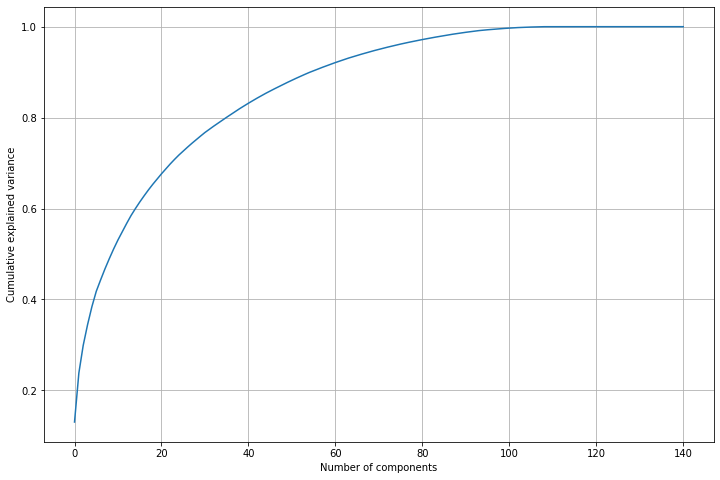

In [58]:
# Plotting cumulative variance for better udnerstanding
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

##### 55 components describe 90% variance and 71 components to describe 95% variance

In [59]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=71)
telecom_X_train_pca = pca_final.fit_transform(X_train)
telecom_X_train_pca.shape

(16118, 71)

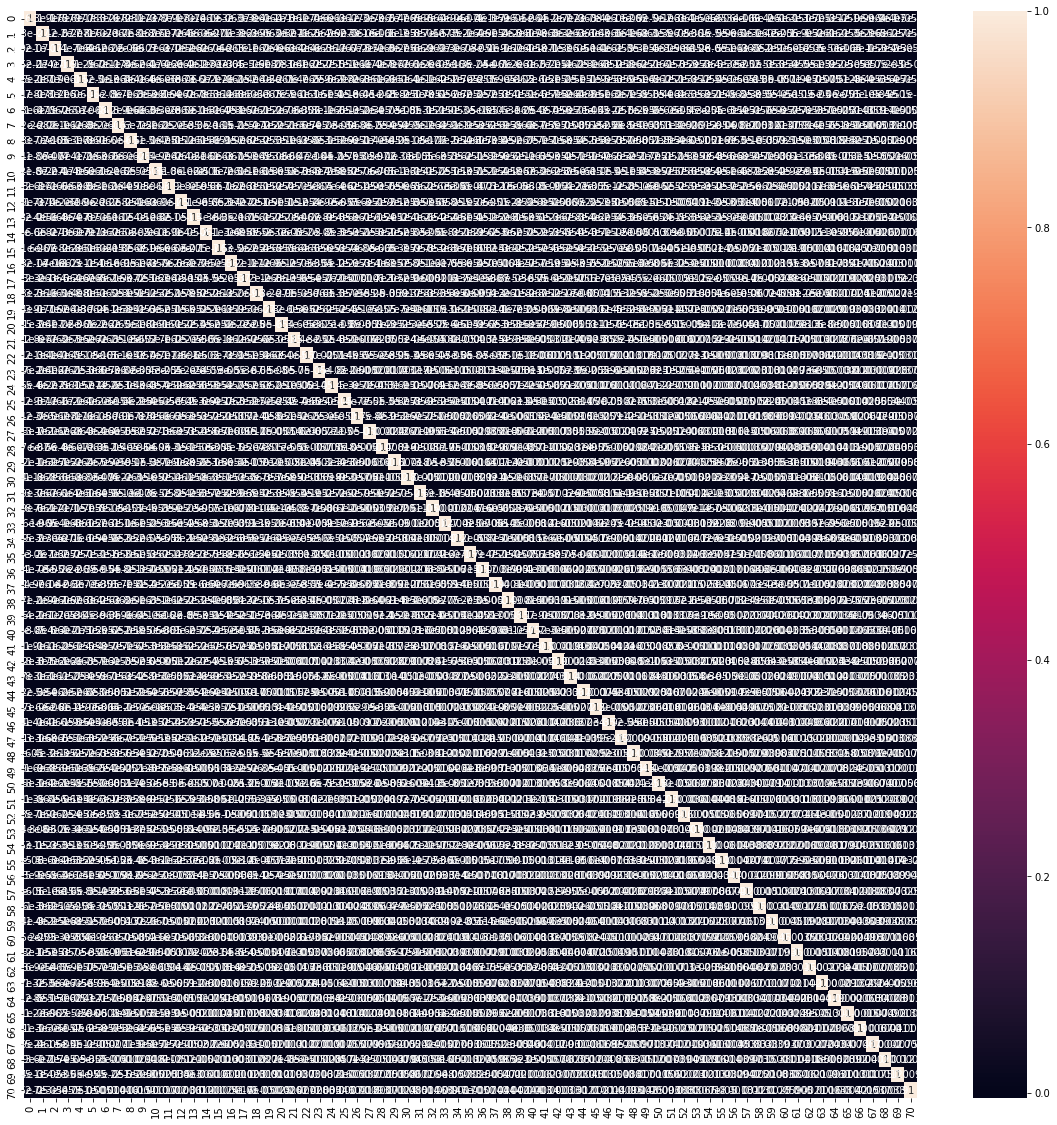

In [60]:
# Checking after PCA correlation between variables
corrmat = np.corrcoef(telecom_X_train_pca.transpose())
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)

In [61]:
telecom_X_test_pca = pca_final.transform(X_test)
telecom_X_test_pca.shape

(6909, 71)

## Model Building, Hyper Parameter tuning and Evaluation of models
### Logistic Regression

### Logistic regression with PCA:

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(telecom_X_train_pca, y_train)

In [63]:
from sklearn.metrics import roc_auc_score,classification_report
predicted_proba = lr_model.predict_proba(telecom_X_test_pca)[:, 1]
"{:2.2}".format(roc_auc_score(y_test, predicted_proba))

'0.86'

In [64]:
# Model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=lr_model.predict(telecom_X_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[6498   31]
 [ 333   47]]
0.9473150962512664
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6529
           1       0.60      0.12      0.21       380

    accuracy                           0.95      6909
   macro avg       0.78      0.56      0.59      6909
weighted avg       0.93      0.95      0.93      6909



In [65]:
pca_column_frame = pca_df.head(71)
pca_column_frame.head()

PC1       PC2      Feature
0  0.148509  0.036138       arpu_6
1  0.160604  0.030973       arpu_7
2  0.144947  0.057070       arpu_8
3  0.116232 -0.081618  onnet_mou_6
4  0.124221 -0.086629  onnet_mou_7

In [66]:
# Logistic mdoel coefficients with pca columns to udnerstand suitable variables in our analysis
pca_column_frame['coeff'] = lr_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

PC1       PC2           Feature     coeff
33  0.097312 -0.094343  std_og_t2m_mou_6 -0.537844
38  0.018970  0.045351  std_og_t2f_mou_8 -0.406146
37  0.019300  0.046556  std_og_t2f_mou_7 -0.402340
1   0.160604  0.030973            arpu_7 -0.362026
40  0.134550 -0.145889      std_og_mou_7 -0.324162
21  0.042970  0.101126  loc_og_t2f_mou_6 -0.310497
28  0.131979  0.140532      loc_og_mou_7 -0.253335
24  0.007461 -0.004465  loc_og_t2c_mou_6 -0.244239
3   0.116232 -0.081618       onnet_mou_6 -0.242106
62  0.032468  0.110710  loc_ic_t2f_mou_8 -0.226617
39  0.125518 -0.141004      std_og_mou_6 -0.204954
57  0.084537  0.156039  loc_ic_t2m_mou_6 -0.186980
67  0.054502 -0.011185  std_ic_t2t_mou_7 -0.168876
27  0.119323  0.136675      loc_og_mou_6 -0.165919
23  0.046294  0.102584  loc_og_t2f_mou_8 -0.142541
49 -0.000000  0.000000       og_others_7 -0.139263
4   0.124221 -0.086629       onnet_mou_7 -0.126029
64  0.102867  0.178109      loc_ic_mou_7 -0.124692
48  0.032212 -0.022697       og_others_6 -0.116454
54  0.069977  0.109983  loc_ic_t2t_mou_6 -0.104697
20  0.116065  0.134165  loc_og_t2m_mou_8 -0.097752
51  0.176050 -0.063300    total_og_mou_6 -0.095262
30  0.089566 -0.116195  std_og_t2t_mou_6 -0.094880
19  0.118952  0.128969  loc_og_t2m_mou_7 -0.090207
0   0.148509  0.036138            arpu_6 -0.071075
2   0.144947  0.057070            arpu_8 -0.068456
26  0.014482 -0.005154  loc_og_t2c_mou_8 -0.063104
6   0.145213 -0.016276      offnet_mou_6 -0.052972
32  0.094775 -0.106791  std_og_t2t_mou_8 -0.052870
66  0.052511 -0.010277  std_ic_t2t_mou_6 -0.049409
15  0.082826  0.086640  loc_og_t2t_mou_6 -0.043423
11  0.018988 -0.001290     roam_ic_mou_8 -0.042629
14  0.027425 -0.017549     roam_og_mou_8 -0.037044
61  0.033479  0.108763  loc_ic_t2f_mou_7 -0.036250
22  0.046161  0.102897  loc_og_t2f_mou_7 -0.034373
12  0.028121 -0.017025     roam_og_mou_6 -0.028753
29  0.128319  0.146068      loc_og_mou_8 -0.028446
16  0.091299  0.088535  loc_og_t2t_mou_7 -0.024804
31  0.096661 -0.120623  std_og_t2t_mou_7 -0.014754
53  0.178958 -0.045633    total_og_mou_8 -0.014306
41  0.129467 -0.125658      std_og_mou_8 -0.013969
69  0.055987  0.016696  std_ic_t2m_mou_6 -0.004971
56  0.076285  0.119247  loc_ic_t2t_mou_8 -0.004558
34  0.103813 -0.097465  std_og_t2m_mou_7  0.012341
5   0.121338 -0.071746       onnet_mou_8  0.015095
10  0.016295 -0.002975     roam_ic_mou_7  0.029213
47  0.034516 -0.017469      spl_og_mou_8  0.030539
68  0.053050 -0.002831  std_ic_t2t_mou_8  0.038584
60  0.030163  0.108492  loc_ic_t2f_mou_6  0.051243
52  0.188964 -0.070759    total_og_mou_7  0.053674
70  0.059067  0.012135  std_ic_t2m_mou_7  0.061717
50 -0.000000  0.000000       og_others_8  0.067166
65  0.099515  0.180712      loc_ic_mou_8  0.068662
13  0.019834 -0.022046     roam_og_mou_7  0.070561
36  0.018501  0.044462  std_og_t2f_mou_6  0.072783
42  0.008269  0.022619      isd_og_mou_6  0.084027
55  0.077618  0.113486  loc_ic_t2t_mou_7  0.102234
44  0.009143  0.021340      isd_og_mou_8  0.117525
25  0.007252 -0.014536  loc_og_t2c_mou_7  0.119209
46  0.028876 -0.029500      spl_og_mou_7  0.123081
58  0.091337  0.159889  loc_ic_t2m_mou_7  0.124868
9   0.023361  0.003265     roam_ic_mou_6  0.157172
45  0.019327 -0.015562      spl_og_mou_6  0.167013
8   0.150799 -0.000796      offnet_mou_8  0.187371
18  0.107297  0.125082  loc_og_t2m_mou_6  0.197219
59  0.089048  0.162920  loc_ic_t2m_mou_8  0.199265
63  0.094388  0.173333      loc_ic_mou_6  0.267593
43  0.009026  0.016628      isd_og_mou_7  0.307611
35  0.101399 -0.083475  std_og_t2m_mou_8  0.321011
7   0.154498 -0.021940      offnet_mou_7  0.442597
17  0.092149  0.096570  loc_og_t2t_mou_8  0.609571

In [67]:
## Class weight balanced for balaning data set logistic regression
from sklearn.linear_model import LogisticRegression
lr_bal = LogisticRegression(class_weight='balanced')
lr_model_bal = lr_bal.fit(telecom_X_train_pca, y_train)

In [68]:
from sklearn.metrics import roc_auc_score,classification_report

# ROC
predicted_proba = lr_model_bal.predict_proba(telecom_X_test_pca)[:, 1]
"{:2.2}".format(roc_auc_score(y_test, predicted_proba))

'0.86'

In [69]:
# Model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=lr_model_bal.predict(telecom_X_test_pca)
print('Confusion matrix afer class balance''\n',confusion_matrix(y_test,y_pred))
print('Accuracy of LR Model after class balance\n',accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

Confusion matrix afer class balance
 [[5192 1337]
 [  84  296]]
Accuracy of LR Model after class balance
 0.7943262411347518
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      6529
           1       0.18      0.78      0.29       380

    accuracy                           0.79      6909
   macro avg       0.58      0.79      0.59      6909
weighted avg       0.94      0.79      0.85      6909



In [70]:
# Logistic mdoel coefficients with pca columns to udnerstand suitable variables in our analysis
pca_column_frame['coeff'] = lr_model_bal.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

PC1       PC2           Feature     coeff
33  0.097312 -0.094343  std_og_t2m_mou_6 -0.504541
37  0.019300  0.046556  std_og_t2f_mou_7 -0.398775
40  0.134550 -0.145889      std_og_mou_7 -0.398767
38  0.018970  0.045351  std_og_t2f_mou_8 -0.366416
1   0.160604  0.030973            arpu_7 -0.301864
24  0.007461 -0.004465  loc_og_t2c_mou_6 -0.281035
21  0.042970  0.101126  loc_og_t2f_mou_6 -0.250846
28  0.131979  0.140532      loc_og_mou_7 -0.245724
3   0.116232 -0.081618       onnet_mou_6 -0.228488
57  0.084537  0.156039  loc_ic_t2m_mou_6 -0.220480
39  0.125518 -0.141004      std_og_mou_6 -0.184769
62  0.032468  0.110710  loc_ic_t2f_mou_8 -0.173933
23  0.046294  0.102584  loc_og_t2f_mou_8 -0.136117
27  0.119323  0.136675      loc_og_mou_6 -0.134431
49 -0.000000  0.000000       og_others_7 -0.132458
67  0.054502 -0.011185  std_ic_t2t_mou_7 -0.124305
19  0.118952  0.128969  loc_og_t2m_mou_7 -0.123065
15  0.082826  0.086640  loc_og_t2t_mou_6 -0.122179
64  0.102867  0.178109      loc_ic_mou_7 -0.121516
54  0.069977  0.109983  loc_ic_t2t_mou_6 -0.104054
48  0.032212 -0.022697       og_others_6 -0.100956
20  0.116065  0.134165  loc_og_t2m_mou_8 -0.098380
30  0.089566 -0.116195  std_og_t2t_mou_6 -0.095033
26  0.014482 -0.005154  loc_og_t2c_mou_8 -0.078469
11  0.018988 -0.001290     roam_ic_mou_8 -0.065527
4   0.124221 -0.086629       onnet_mou_7 -0.064393
22  0.046161  0.102897  loc_og_t2f_mou_7 -0.062178
31  0.096661 -0.120623  std_og_t2t_mou_7 -0.059287
29  0.128319  0.146068      loc_og_mou_8 -0.054717
51  0.176050 -0.063300    total_og_mou_6 -0.052270
61  0.033479  0.108763  loc_ic_t2f_mou_7 -0.044679
6   0.145213 -0.016276      offnet_mou_6 -0.044268
2   0.144947  0.057070            arpu_8 -0.041084
34  0.103813 -0.097465  std_og_t2m_mou_7 -0.039098
16  0.091299  0.088535  loc_og_t2t_mou_7 -0.033427
0   0.148509  0.036138            arpu_6 -0.032210
32  0.094775 -0.106791  std_og_t2t_mou_8 -0.030809
12  0.028121 -0.017025     roam_og_mou_6 -0.027914
41  0.129467 -0.125658      std_og_mou_8 -0.026331
14  0.027425 -0.017549     roam_og_mou_8 -0.026146
60  0.030163  0.108492  loc_ic_t2f_mou_6 -0.015847
10  0.016295 -0.002975     roam_ic_mou_7 -0.012445
53  0.178958 -0.045633    total_og_mou_8 -0.009292
66  0.052511 -0.010277  std_ic_t2t_mou_6 -0.002812
56  0.076285  0.119247  loc_ic_t2t_mou_8  0.006349
47  0.034516 -0.017469      spl_og_mou_8  0.009703
5   0.121338 -0.071746       onnet_mou_8  0.020258
36  0.018501  0.044462  std_og_t2f_mou_6  0.042442
42  0.008269  0.022619      isd_og_mou_6  0.056822
52  0.188964 -0.070759    total_og_mou_7  0.072390
13  0.019834 -0.022046     roam_og_mou_7  0.085649
25  0.007252 -0.014536  loc_og_t2c_mou_7  0.093094
69  0.055987  0.016696  std_ic_t2m_mou_6  0.097065
50 -0.000000  0.000000       og_others_8  0.102418
70  0.059067  0.012135  std_ic_t2m_mou_7  0.103695
59  0.089048  0.162920  loc_ic_t2m_mou_8  0.118036
44  0.009143  0.021340      isd_og_mou_8  0.119742
68  0.053050 -0.002831  std_ic_t2t_mou_8  0.124833
65  0.099515  0.180712      loc_ic_mou_8  0.129430
55  0.077618  0.113486  loc_ic_t2t_mou_7  0.135773
46  0.028876 -0.029500      spl_og_mou_7  0.154515
58  0.091337  0.159889  loc_ic_t2m_mou_7  0.169219
18  0.107297  0.125082  loc_og_t2m_mou_6  0.172919
45  0.019327 -0.015562      spl_og_mou_6  0.175743
9   0.023361  0.003265     roam_ic_mou_6  0.182864
8   0.150799 -0.000796      offnet_mou_8  0.193221
63  0.094388  0.173333      loc_ic_mou_6  0.199096
35  0.101399 -0.083475  std_og_t2m_mou_8  0.260751
43  0.009026  0.016628      isd_og_mou_7  0.319416
7   0.154498 -0.021940      offnet_mou_7  0.441829
17  0.092149  0.096570  loc_og_t2t_mou_8  0.629710

### Logistic Model parameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Logistic Regression Model
lr_bal = LogisticRegression(random_state=100, solver = 'liblinear',class_weight='balanced')

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Select Hyperparameters -> Logistic Regularization parameter (C) and the Regularization (L1 or L2)
log_params = {'C': [0.1, 0.5, 1, 2, 5], 'penalty': ['l1', 'l2']}

# Create Gridsearch Cross Validation object
log_model = GridSearchCV(estimator = lr_bal, cv = folds, param_grid = log_params, scoring = 'roc_auc',
                         verbose = 1, return_train_score = True)

# Fit the Logistic Regression model
log_model.fit(telecom_X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2, 5], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [72]:
# cross validation results
pd.DataFrame(log_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.188496      0.025152         0.002992        0.000892     0.1   
1       0.246959      0.032622         0.002972        0.000906     0.1   
2       0.207059      0.055152         0.002581        0.000492     0.5   
3       0.226216      0.032030         0.002573        0.000789     0.5   
4       0.219419      0.071119         0.002787        0.000396       1   
5       0.220229      0.024520         0.002176        0.000393       1   
6       0.231201      0.072556         0.003372        0.000807       2   
7       0.221023      0.025550         0.002582        0.000780       2   
8       0.237577      0.070197         0.002980        0.000640       5   
9       0.214445      0.028310         0.002375        0.000504       5   

  param_penalty                       params  split0_test_score  \
0            l1  {'C': 0.1, 'penalty': 'l1'}           0.874836   
1            l2  {'C': 0.1, 'penalty': 'l2'}           0.875302   
2            l1  {'C': 0.5, 'penalty': 'l1'}           0.875213   
3            l2  {'C': 0.5, 'penalty': 'l2'}           0.875254   
4            l1    {'C': 1, 'penalty': 'l1'}           0.875257   
5            l2    {'C': 1, 'penalty': 'l2'}           0.875254   
6            l1    {'C': 2, 'penalty': 'l1'}           0.875248   
7            l2    {'C': 2, 'penalty': 'l2'}           0.875257   
8            l1    {'C': 5, 'penalty': 'l1'}           0.875248   
9            l2    {'C': 5, 'penalty': 'l2'}           0.875254   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.862490           0.863867           0.878230           0.895771   
1           0.861937           0.863226           0.878291           0.896161   
2           0.862022           0.863131           0.878315           0.896310   
3           0.861922           0.862946           0.878325           0.896424   
4           0.861993           0.862977           0.878299           0.896403   
5           0.861937           0.862879           0.878340           0.896444   
6           0.861974           0.862881           0.878347           0.896454   
7           0.861950           0.862829           0.878342           0.896435   
8           0.861952           0.862842           0.878347           0.896439   
9           0.861944           0.862801           0.878343           0.896433   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.875039        0.012020                1            0.889627   
1         0.874983        0.012393                4            0.889935   
2         0.874998        0.012445                2            0.889964   
3         0.874974        0.012541                6            0.890003   
4         0.874986        0.012512                3            0.889996   
5         0.874971        0.012559                7            0.890016   
6         0.874981        0.012554                5            0.890008   
7         0.874963        0.012563                9            0.890017   
8         0.874966        0.012561                8            0.890018   
9         0.874955        0.012569               10            0.890020   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.894448            0.895902            0.891392   
1            0.894713            0.896342            0.891615   
2            0.894739            0.896401            0.891638   
3            0.894766            0.896492            0.891670   
4            0.894753            0.896461            0.891662   
5            0.894765            0.896506            0.891675   
6            0.894756            0.896496            0.891673   
7            0.894766            0.896517            0.891677   
8            0.894765            0.896518            0.891680   
9            0.894770            0.896521            0.891677   

   sp

In [73]:
# print best hyperparameters
print("Best AUC: ", log_model.best_score_)
print("Best hyperparameters: ", log_model.best_params_)

Best AUC:  0.8750387190947292
Best hyperparameters:  {'C': 0.1, 'penalty': 'l1'}


In [74]:
from imblearn.metrics import sensitivity_specificity_support
# predict churn on test data
y_pred = log_model.predict(telecom_X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = log_model.predict_proba(telecom_X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5194 1335]
 [  83  297]]
Sensitivity: 	0.78
Specificity: 	0.8
AUC:    	 0.86


### Best model Logistic Regression

In [75]:
log_model_best = LogisticRegression(C=0.1, penalty= 'l2',class_weight='balanced')
log_model_best.fit(telecom_X_train_pca, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# predict churn on test data
y_pred = log_model_best.predict(telecom_X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = log_model_best.predict_proba(telecom_X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5196 1333]
 [  84  296]]
Sensitivity: 	0.78
Specificity: 	0.8
AUC:    	 0.86


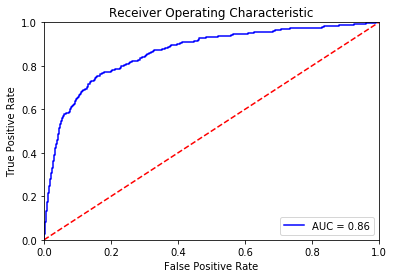

In [77]:
from sklearn import metrics
# To draw ROC to understand better Area under curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)


roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest with PCA

In [78]:
# Default parameter tuning
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(telecom_X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
# Making predictions
predictions = rfc.predict(telecom_X_test_pca)

In [80]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [81]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6529
           1       0.59      0.03      0.06       380

    accuracy                           0.95      6909
   macro avg       0.77      0.52      0.52      6909
weighted avg       0.93      0.95      0.92      6909



In [82]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6520    9]
 [ 367   13]]


In [83]:
#Optimising with gridsearchcv
n_folds=5
params_grid={
     'max_depth': range(2,20,5),
     'min_samples_leaf': range(100, 400, 200),
     'min_samples_split': range(200, 500, 200),
     'n_estimators': [100,200, 300], 
     'max_features': [5, 10]
 }

rfc_grid_pca = RandomForestClassifier(class_weight='balanced')
grid_rf_model_pca = GridSearchCV(rfc_grid_pca,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model_pca.fit(telecom_X_train_pca,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [84]:
grid_rf_model_pca.best_params_

{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

### Best model Random forest

In [85]:
# model defination
model_rfc_best = RandomForestClassifier(
    criterion='entropy',
    max_depth= 12,
    max_features= 5,
    min_samples_leaf= 100,
    min_samples_split= 200,
    n_estimators= 200,
    class_weight='balanced', 
    n_jobs = -1)
# Fitting the model
model_rfc_best.fit(telecom_X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=12, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [88]:
# predict churn on test data
y_pred = model_rfc_best.predict(telecom_X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_rfc_best.predict_proba(telecom_X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5916  613]
 [ 144  236]]
Sensitivity: 	0.62
Specificity: 	0.91
AUC:    	 0.85


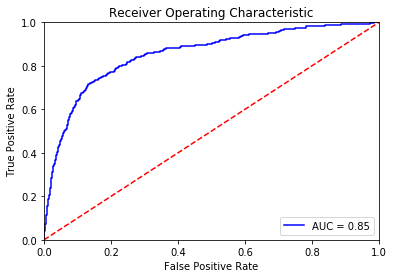

In [89]:
from sklearn import metrics
# To draw ROC to understand better Area under curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)


roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVC with PCA

In [90]:
from sklearn.svm import SVC

In [91]:
# using rbf kernel, C=1, default value of gamma

model_svc = SVC(C = 1, kernel='rbf')
model_svc.fit(telecom_X_train_pca, y_train)
y_pred = model_svc.predict(telecom_X_test_pca) 

In [92]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6529,    0],
       [ 378,    2]], dtype=int64)

In [93]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')



Sensitivity: 	0.01
Specificity: 	1.0


In [94]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9452887537993921
precision 1.0
recall 0.005263157894736842


In [95]:
# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 43,)
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model_svc_tune = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_svc_tune, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=43, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [96]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       33.570635      2.524164         6.261877        0.640947       1   
1       21.613015      2.178758         3.148780        0.312232       1   
2       15.995828      0.813322         2.933157        0.254664       1   
3       30.391135      0.605216         5.574096        0.245869      10   
4       19.997926      0.528240         2.911615        0.154199      10   
5       21.831423      0.390116         3.024313        0.069724      10   
6       26.403398      0.336819         4.360142        0.094368     100   
7       25.511184      0.793231         3.200443        0.249112     100   
8       25.223554      0.587798         2.838210        0.326756     100   
9       27.176731      2.323388         4.287536        0.243658    1000   
10      38.459961      1.547075         3.301173        0.632026    1000   
11      29.769797      0.635655         2.157631        0.297021    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.945409   
1        0.001      {'C': 1, 'gamma': 0.001}           0.945409   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.945409   
3         0.01      {'C': 10, 'gamma': 0.01}           0.942928   
4        0.001     {'C': 10, 'gamma': 0.001}           0.945409   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.945409   
6         0.01     {'C': 100, 'gamma': 0.01}           0.935174   
7        0.001    {'C': 100, 'gamma': 0.001}           0.942308   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.945409   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.927419   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.925558   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.944789   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.944789           0.945099           0.945082   
1            0.945099           0.945099           0.945392   
2            0.945099           0.945099           0.945392   
3            0.940447           0.944169           0.945082   
4            0.945099           0.945099           0.945392   
5            0.945099           0.945099           0.945392   
6            0.928660           0.928350           0.932361   
7            0.942618           0.942308           0.942290   
8            0.945099           0.945099           0.945392   
9            0.923077           0.927109           0.926776   
10           0.926489           0.933002           0.931430   
11           0.945099           0.944789           0.945703   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.945703         0.945217        0.000312                7   
1            0.945392         0.945279        0.000147                1   
2            0.945392         0.945279        0.000147                1   
3            0.937946         0.942114        0.002602                9   
4            0.945392         0.945279        0.000147                1   
5            0.945392         0.945279        0.000147                1   
6            0.921812         0.929271        0.004500               10   
7            0.942290         0.942363        0.000128                8   
8            0.945392         0.945279        0.000147                1   
9            0.917468         0.924370        0.003792               12   
10           0.926466         0.928589        0.003022               11   
11           0.945703         0.945217        0.000413                6   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.949744            0.948658            0.948891   
1             0.945246            0.945323            0.945323   
2             0.945246            0.945323            0.945323   
3             0.986971            0.987436            0.986660   
4             0.9

In [97]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.9452785846763607
Best hyperparameters:  {'C': 1, 'gamma': 0.001}


#### Best model SVC

In [98]:
# specify optimal hyperparameters
best_params = {"C": 1, "gamma": 0.001, "kernel":"rbf"}

# model
model_svc_best = SVC(C=1, gamma=0.001, kernel="rbf")

model_svc_best.fit(telecom_X_train_pca, y_train)
y_pred = model_svc_best.predict(telecom_X_test_pca)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))

[[6529    0]
 [ 380    0]] 

accuracy 0.9449992763062672


In [99]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.0
Specificity: 	1.0


In [100]:
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

precision 0.0
sensitivity/recall 0.0


### Best Generalized model is Linear Regression as AUC is maximum and sensitivity is very low or zero in other models

## Feauture Selection

In [101]:
# Best features from log model
coef_best = log_model_best.coef_[0]
best_features_names = pca_column_frame['Feature']
# Absolute to take all high coeff 
coef_best=np.abs(coef_best)
# Feature Dataframe
best_feature_df=pd.DataFrame({'Feature':best_features_names,'Measure':coef_best})
best_feature_df.head()

Feature   Measure
0       arpu_6  0.032341
1       arpu_7  0.300761
2       arpu_8  0.040564
3  onnet_mou_6  0.226064
4  onnet_mou_7  0.063309

In [102]:
# Best features
best_feature_df=best_feature_df.sort_values(by=['Measure'],ascending=False)
best_feature_df.head(10)

Feature   Measure
17  loc_og_t2t_mou_8  0.623746
33  std_og_t2m_mou_6  0.485509
7       offnet_mou_7  0.440272
40      std_og_mou_7  0.393510
37  std_og_t2f_mou_7  0.384027
38  std_og_t2f_mou_8  0.350045
43      isd_og_mou_7  0.310731
1             arpu_7  0.300761
24  loc_og_t2c_mou_6  0.275688
35  std_og_t2m_mou_8  0.249666

#### Logstic regression model has 94% Accuarcy and it looks genralized compared to other models
#### Few main Features are related to action phase like arpu_8, onnet_mou_8, offnet_mou_8

## Summary of Telecom Churn case study and Our Observations
* From Logistic regression, we can say that the results are in line with what we have observed in the begining of our EDA code
* Local Incoming for Month 8, Average revenue per customer for month 8, Recharge amount for Month 8 can be used for predicting churn variables.
* Many of the customers in dataset falls under below 5 year tenure only
* Revenue per customer is one of the strong indicators of churn
* Max recharge amount could be a good churn indicator

## Business Insights

* 8th month(`Month related to drop in usage`)  was crucial month it means when telecom company sees steep drop in mentioned 10 features they should start giving more and more offers.
* Telecom company needs to pay attention to the `roaming rates`. They need to provide good offers to the customers who are using services from a roaming zone.
* Top 30 features consist of `STD and ISD` as well. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 